In [1]:
print("Hello World!")

Hello World!


this is going to summarize a bunch of resources. For now:
* https://www.w3schools.com/python/default.asp
* [Kylie Ying - Introduction to Programming](https://www.youtube.com/watch?v=GGdmIL85qos&list=PLkWv3oO4kHnsiGHnifBxa79d-xPwYDiAx&index=1)

In [2]:
import urllib
import json
from IPython.display import display, Markdown

def generate_toc(notebook_path, indent_char="&emsp;"):
    is_markdown = lambda it: "markdown" == it["cell_type"]
    is_title = lambda it: it.strip().startswith("#") and it.strip().lstrip("#").lstrip()
    
    # Load the notebook JSON
    with open(notebook_path, 'r', encoding='utf-8') as in_f: # Use 'utf-8-sig' if necessary
        nb_json = json.load(in_f)
    
    toc_lines = []
    for cell in filter(is_markdown, nb_json["cells"]):
        for line in filter(is_title, cell["source"]):
            line = line.strip()
            indent = indent_char * (line.index(" ") - 1)
            title = line.lstrip("#").lstrip()
            url = urllib.parse.quote(title.replace(" ", "-"))
            out_line = f"{indent}[{title}](#{url})<br>\n"
            toc_lines.append(out_line)
    
    # Join the lines into a single string
    toc_output = ''.join(toc_lines)
    
    # Display the TOC in the Jupyter notebook cell
    display(Markdown(toc_output))

# Call the function with the path to your notebook
generate_toc('python.ipynb')

[installing python](#installing-python)<br>
[IDEs](#IDEs)<br>
[dependencies management](#dependencies-management)<br>
[virtual environments](#virtual-environments)<br>
[version control](#version-control)<br>
[variables <a name="variables"></a>](#variables-%3Ca-name%3D%22variables%22%3E%3C/a%3E)<br>
&emsp;[naming conventions](#naming-conventions)<br>
&emsp;[data structures <a name="data-types"></a>](#data-structures-%3Ca-name%3D%22data-types%22%3E%3C/a%3E)<br>
&emsp;&emsp;[Numeric](#Numeric)<br>
&emsp;&emsp;[Boolean](#Boolean)<br>
&emsp;&emsp;[Sequence types](#Sequence-types)<br>
&emsp;&emsp;&emsp;[Strings](#Strings)<br>
&emsp;&emsp;&emsp;[Range sequences](#Range-sequences)<br>
&emsp;&emsp;&emsp;[Lists](#Lists)<br>
&emsp;&emsp;&emsp;[Tuple](#Tuple)<br>
&emsp;&emsp;[Set types](#Set-types)<br>
&emsp;&emsp;[Mapping types](#Mapping-types)<br>
&emsp;&emsp;&emsp;[Dictionaries](#Dictionaries)<br>
&emsp;&emsp;[Other object types](#Other-object-types)<br>
&emsp;&emsp;[classes and objects](#classes-and-objects)<br>
&emsp;[Operators <a name="operators"></a>](#Operators-%3Ca-name%3D%22operators%22%3E%3C/a%3E)<br>
[conditions](#conditions)<br>
[loops](#loops)<br>
[functions](#functions)<br>
[user input](#user-input)<br>
[installing packages](#installing-packages)<br>
[file and directory access](#file-and-directory-access)<br>
[regular expressions](#regular-expressions)<br>


# setting up an environment

## installing python

* `Anaconda` distribution

    https://www.anaconda.com/download
* Miniconda

    minimal installer for conda
    https://docs.anaconda.com/miniconda/
    
* just python

    https://www.python.org/

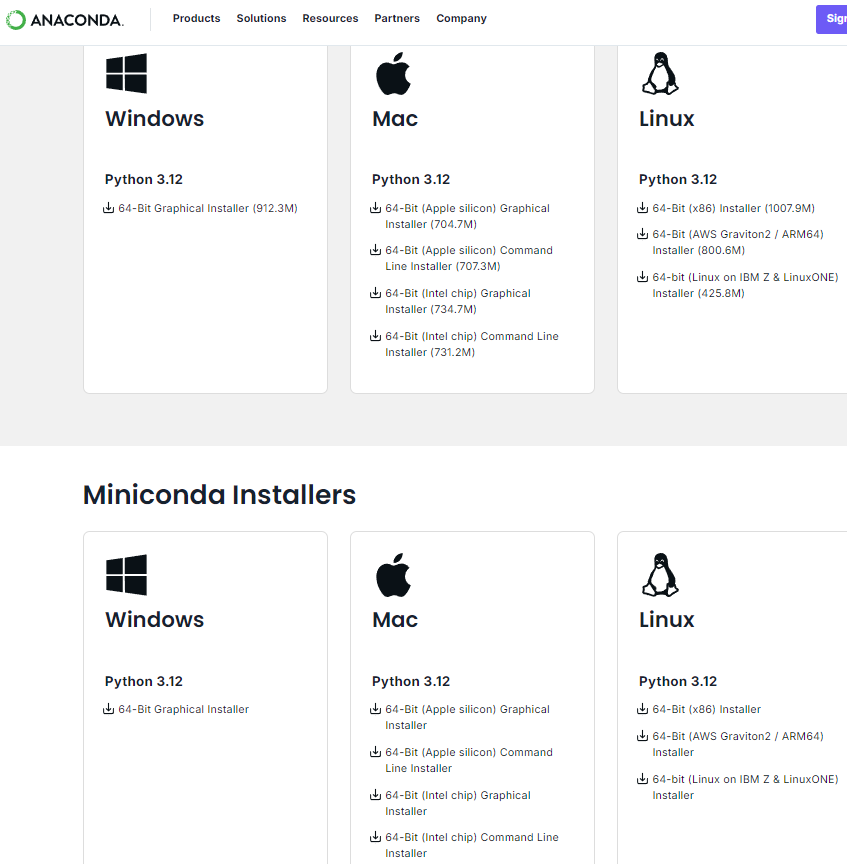

You use the CPython interpreter like this

`python --version`

`python myscript.py`

https://github.com/python/cpython

https://docs.python.org/3.14/using/cmdline.html

## REPLs and IDEs

* [Rob Mulla - Jupyter Notebook Complete Beginner Guide](https://www.youtube.com/watch?v=5pf0_bpNbkw)

**REPLs**

* the CPython interpreter in interactive mode

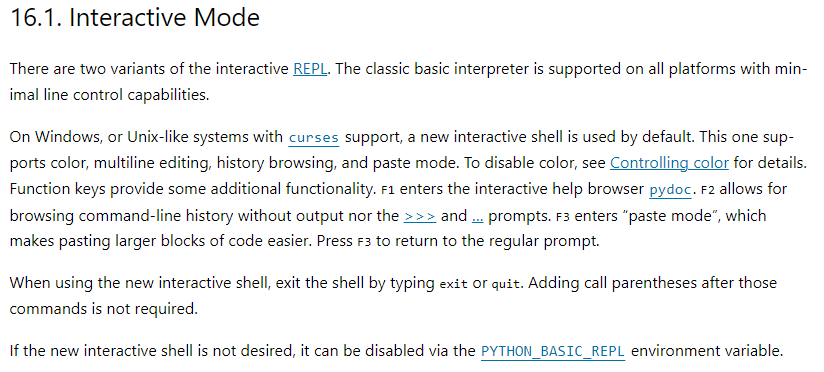

* `IPython` (Interactive Python) console

    type `ipython` to start it

    https://ipython.org/

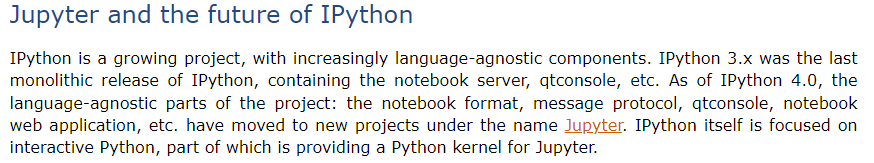

**IDEs**
* `IDLE`

    comes with every Python distribution; noone uses it

* `VSCode`

    https://code.visualstudio.com/
* `Jupyter notebooks`
    
    https://jupyter.org/
    
    The Jupyter Notebook is the original web application for creating and sharing computational documents.
    
* `JupyterLab`
    
    JupyterLab is the latest web-based interactive development environment for notebooks, code, and data

get information about the interpreter by using the `sys` module

https://docs.python.org/3/library/sys.html

In [2]:
import sys

In [ ]:
help(sys)

In [4]:
sys.version
# A string containing the version number of the Python interpreter plus additional information
# on the build number and compiler used.
# Do not extract version information out of it, rather, use version_info and the functions provided by the platform module.

'3.10.4 (tags/v3.10.4:9d38120, Mar 23 2022, 23:13:41) [MSC v.1929 64 bit (AMD64)]'

In [5]:
sys.version_info
# A tuple containing the five components of the version number: major, minor, micro, releaselevel, and serial. 
# All values except releaselevel are integers; the release level is 'alpha', 'beta', 'candidate', or 'final'.

sys.version_info(major=3, minor=10, micro=4, releaselevel='final', serial=0)

In [6]:
if sys.version_info.major != 3:
    raise Exception('Version problem', 'this assumes python 3')
else:
    print("using python v3")

using python v3


not very useful in here because the kernel which is running also shows the version (top right corner)

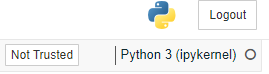

In [ ]:
sys.platform
# This string contains a platform identifier that can be used to append platform-specific components to sys.path, for instance.
# The platform module provides detailed checks for the system’s identity.

'win32'

In [8]:
if sys.platform.startswith('freebsd'):
    # FreeBSD-specific code here...
    pass
elif sys.platform.startswith('linux'):
    # Linux-specific code here...
    pass
elif sys.platform.startswith('aix'):
    # AIX-specific code here...
    pass
elif sys.platform == 'win32':
    print("On Windows")
elif sys.platform == 'darwin':
    print("On a Mac")
elif sys.platform == 'cygwin':
    print("Windows/Cygwin")
else:
    print("IDK")

In [9]:
sys.executable
# A string giving the absolute path of the executable binary for the Python interpreter, on systems where this makes sense.

'C:\\Users\\ricga\\AppData\\Local\\Programs\\Python\\Python310\\python.exe'

In [10]:
sys.path
# A list of strings that specifies the search path for modules. 
# Initialized from the environment variable PYTHONPATH, plus an installation-dependent default.

['D:\\repos\\python-jupyter',
 'C:\\Users\\ricga\\AppData\\Local\\Programs\\Python\\Python310\\python310.zip',
 'C:\\Users\\ricga\\AppData\\Local\\Programs\\Python\\Python310\\DLLs',
 'C:\\Users\\ricga\\AppData\\Local\\Programs\\Python\\Python310\\lib',
 'C:\\Users\\ricga\\AppData\\Local\\Programs\\Python\\Python310',
 '',
 'C:\\Users\\ricga\\AppData\\Roaming\\Python\\Python310\\site-packages',
 'C:\\Users\\ricga\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages',
 'C:\\Users\\ricga\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\win32',
 'C:\\Users\\ricga\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\ricga\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\Pythonwin']

**shebang**

a shebang is the character sequence #!, consisting of the characters number sign (also known as sharp or hash) and exclamation mark (also known as bang), at the beginning of a script.

When a text file with a shebang is used as if it were an executable in a Unix-like operating system, the program loader mechanism parses the rest of the file's initial line as an interpreter directive. The loader executes the specified interpreter program, passing to it as an argument the path that was initially used when attempting to run the script, so that the program may use the file as input data. For example, if a script is named with the path path/to/script, and it starts with the line #!/bin/sh, then the program loader is instructed to run the program /bin/sh, passing path/to/script as the first argument.

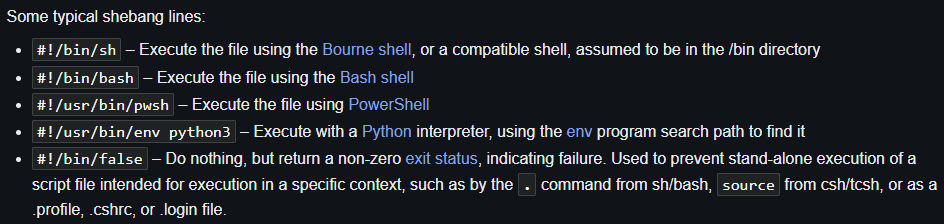

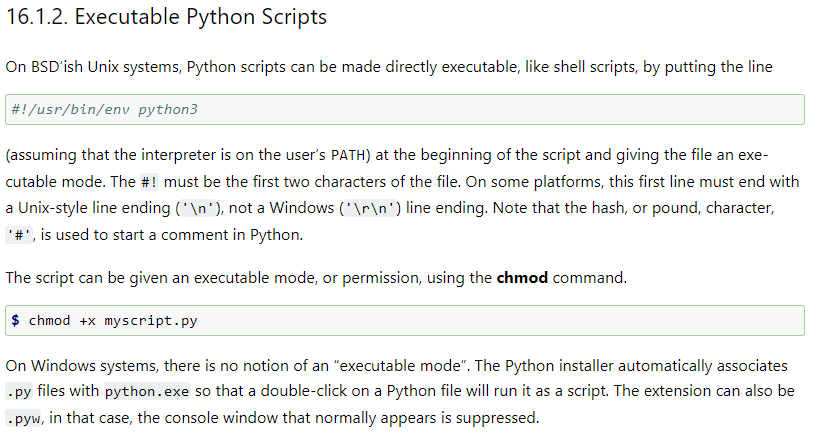

## dependencies management

**using requirements.txt**

    package1==1.0.0
    package2>=2.0.0

**using a setup.py file**

    from setuptools import setup, find_packages

    setup(
        name='your_package',
        version='1.0.0',
        packages=find_packages(),
        install_requires=[
            'package1==1.0.0',
            'package2>=2.0.0',
        ],
        python_requires='>=3.0',
    )

**using a pyproject.toml file**

    [build-system]
    requires = ["setuptools>=42", "wheel"]
    build-backend = "setuptools.build_meta"

    [project]
    name = "your_package"
    version = "1.0.0"
    dependencies = [
        "package1==1.0.0",
        "package2>=2.0.0",
    ]
    requires-python = ">=3.0"

**using Poetry**

https://github.com/python-poetry/poetry

## virtual environments

**without using a virtual environment**

install python and the dependencies

run a file

`python 0.py`

**using a virtual environment**

- create a virtual environment

    `python -m venv venv`

    this creates a virtual environment called venv using the venv module. -m stands for module

    It adds a venv directory to the project

- make sure you are using the right interpreter

    (the one in `.\venv\Scripts\python.exe`)

- activate the virtual environment. 

    This depends on the shell you are using

    If you are using Git Bash,

    `source venv/Scripts/activate`

    The name of the virtual environment (venv) should appear before the shell prompt

- install dependencies

    `pip install -r requirements.txt`

    -r stands for recursive

- deactivate the virtual environment

    `deactivate`

## example setups

### pyenv + pip

* version manager: `pyenv`
* package manager: `pip` (packager installer for python)

https://github.com/pyenv/pyenv

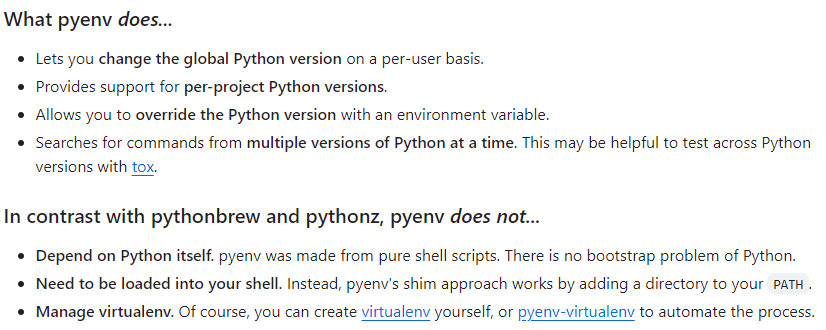

So,
* with this setup you install pyenv and use it to define which python version you want to work with
* there's local, global and shell installations

    Installing globally means the entire system uses it unless there's a more specific (shell > local > global)
* list of python versions that can be installed. Includes anaconda versions.

    `pyenv install --list`
* from that list, you can install a specific version

    `pyenv install 3.10.0`
* list the versions that are installed and which one is active

    `pyenv versions`
* set version for current shell (resets after you kill it)

    `pyenv shell 3.10.0`

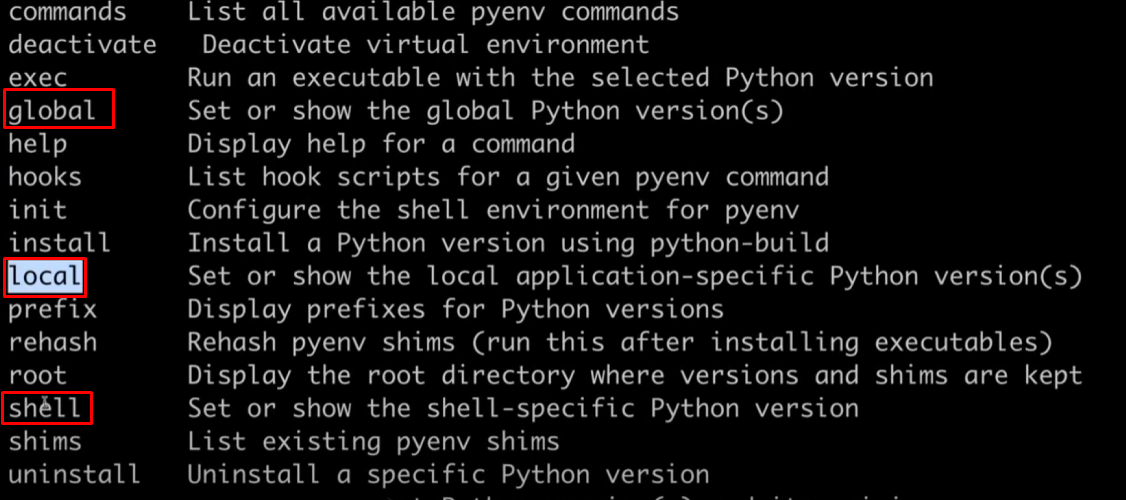

then you would install and upgrade pip and all else you need

### docker

In [ ]:
# TODO

## version control

**Git**

In [11]:
# TODO

**Github**

In [12]:
# TODO

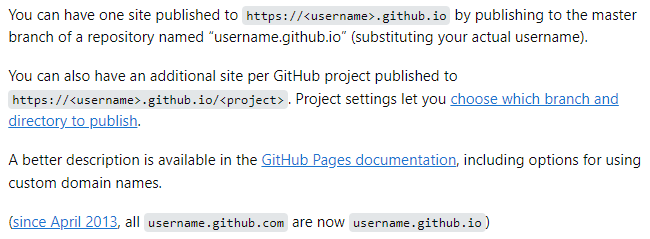

# variables

**Comments**

In [13]:
# This is a comment. No code is executed

In [14]:
print("Hello, World!") #This is a comment

Hello, World!


In [15]:
#This is a comment
#written in
#more than just one line
print("Hello, World!")

Hello, World!


Since Python will ignore string literals that are not assigned to a variable, you can add a multiline string (triple quotes) in your code, and place your comment inside it:

In [16]:
"""
This is a comment
written in
more than just one line
"""
print("Hello, World!")

Hello, World!


**Defining and printing vars**

In [17]:
x = 22

print(x)

22


you can check the type with `type()`

In [18]:
type(x)

int

In [19]:
x = 22

x # in jupyter notebooks, the output of the last statement in each code cell is printed

22

In [20]:
my_name = "Ricardo Abreu"

my_name

'Ricardo Abreu'

In [21]:
type(my_name)

str

In [22]:
x, y, z = 'Choco', 'Vanilla', 'Berry'

print(x)
print(y)
print(z)

Choco
Vanilla
Berry


In [23]:
x = y = z = 'Choco'

print(x)
print(y)
print(z)

Choco
Choco
Choco


In [24]:
x, y, z = 'Choco', 'Vanilla', 'Berry'
icecream = [x, y, z]

print(icecream)

['Choco', 'Vanilla', 'Berry']


In [25]:
type(icecream)

list

In [26]:
a, b, c = icecream

print(a)
print(b)
print(c)

Choco
Vanilla
Berry


Python is `dynamically-typed` ("variable shadowing")

In [1]:
var_name = 123
print(type(var_name))

# reassign it a value of a different data type
var_name = "ric"
print(type(var_name))

<class 'int'>
<class 'str'>


Python is `case-sensitive` (case - uppercase or lowercase - of letters matters)

In [9]:
a = 1
A = 2

print(a)
print(A)

1
2


eg. case-insensitive languages
* SQL
* HTML
* Visual Basic / VBScript
* Pascal
* Ada
* Fortran
* COBOL
* Lisp

**mutable vs immutable types**

`id()` returns an integer representing the memory address where the object is stored

In [8]:
# Immutable Object (String)
a = "Hello"
print("ID of 'a' before modification:", id(a))

a += " World"
print("ID of 'a' after modification:", id(a))

# Mutable Object (List)
b = [1, 2, 3]
print("ID of 'b' before modification:", id(b))

b.append(4)
print("ID of 'b' after modification:", id(b))

ID of 'a' before modification: 1801056793968
ID of 'a' after modification: 1801034592368
ID of 'b' before modification: 1801056495936
ID of 'b' after modification: 1801056495936


## variable naming

### reserved words

in Python there's `keyworks`

https://docs.python.org/3/library/keyword.html

In [17]:
import keyword

The following identifiers are used as reserved words, or keywords of the language, and cannot be used as ordinary identifiers.

In [18]:
# all the keywords defined for the interpreter

keyword.kwlist

['False',
 'None',
 'True',
 'and',
 'as',
 'assert',
 'async',
 'await',
 'break',
 'class',
 'continue',
 'def',
 'del',
 'elif',
 'else',
 'except',
 'finally',
 'for',
 'from',
 'global',
 'if',
 'import',
 'in',
 'is',
 'lambda',
 'nonlocal',
 'not',
 'or',
 'pass',
 'raise',
 'return',
 'try',
 'while',
 'with',
 'yield']

In [19]:
# you can't modify a keyword
def = 4

SyntaxError: invalid syntax (823646212.py, line 1)

### naming conventions

First of all, they should be in english. If you don't know how to say something or are unsure, you look it up and learn in the process. Besides, now there's the AI and you can ask it what to rename it to and to do it for you.

**Camel case**

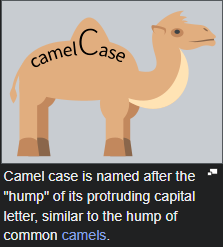

In [3]:
# Camel case
testVariableCase = 'Ric' # Words are delimited by capital letters, except the initial word

**Pascal case**

In [4]:
# Pascal case
TestVariableCase = 'Ric' # Words are delimited by capital letters

**Snake case**

In [5]:
# Snake case
test_variable_case = 'Ric' # Words are delimited by an underscore

**Hungarian notation**

https://en.wikipedia.org/wiki/Hungarian_notation

In [6]:
# Hungarian notation
# This notation describes the variable type or purpose at the start of the variable name, 
# followed by a descriptor that indicates the variable's function. The Camelcase notation is used to delimit words.
stestVariableCase = 'Ric'


arrDistributeGroup = [] # Array called "Distribute Group"
sUserName = '' # String called "User Name"
iRandomSeed = 0 # Integer called "Random Seed"
bBusy = True # Boolean called "Busy"

**PEP**

https://peps.python.org/pep-0008/

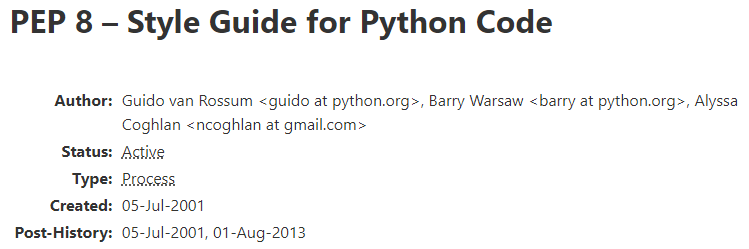

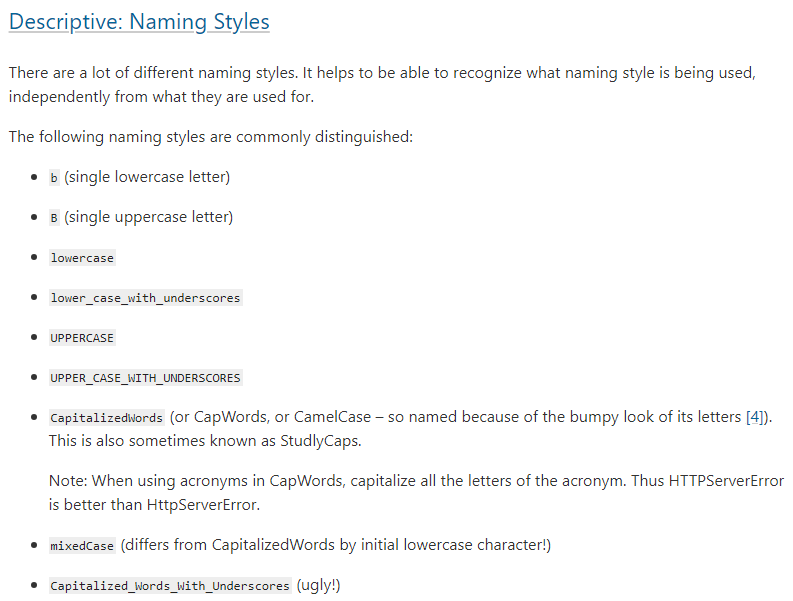

Python and Ruby both recommend `UpperCamelCase` for class names, `CAPITALIZED_WITH_UNDERSCORES` for constants, and `snake_case` for other names.

In Python, if a name is intended to be `"private"`, it is prefixed by one or two underscores. Private variables are enforced in Python only by convention. Names can also be suffixed with an underscore to prevent conflict with Python keywords. 

Prefixing with double underscores changes behaviour in classes with regard to name mangling. Prefixing and suffixing with double underscores - the so-called `"dunder" ("double under") methods` in Python - are reserved for "magic names" which fulfill special behaviour in Python objects.

## data structures

A `data structure` is a specialized format for organizing, managing, and storing data in a computer so that it can be accessed and modified efficiently. It defines the relationships among data elements and the operations that can be performed on them. The implementation of a data structure in a programming language depends on how data is organized and managed in the computer's `memory`

<div>
    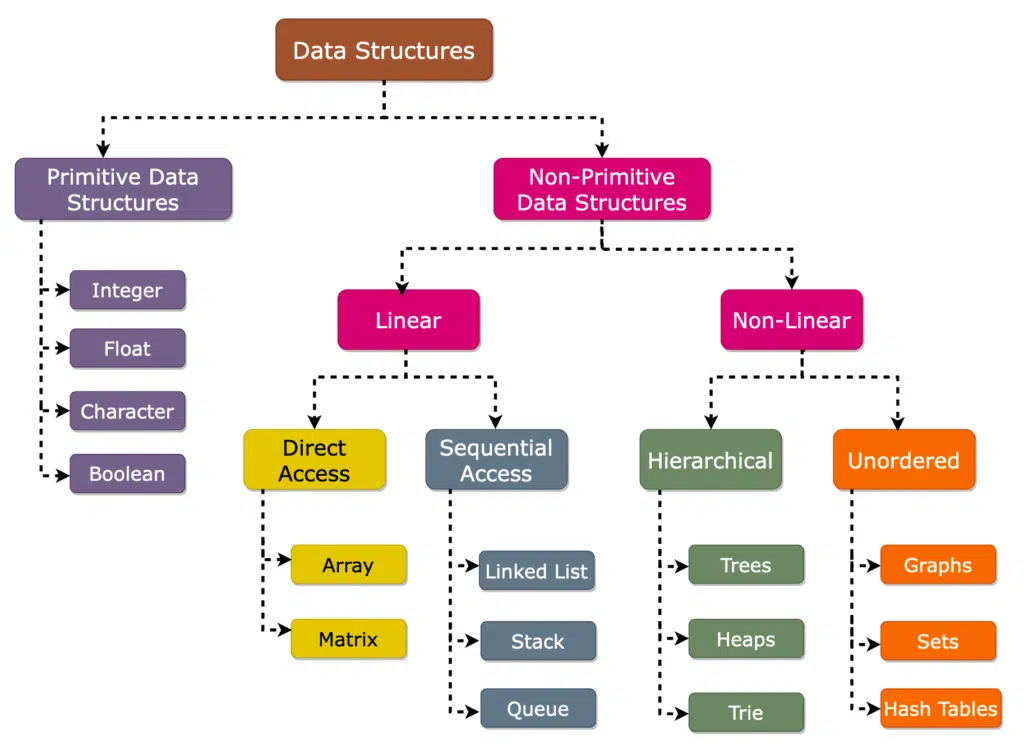
</div>

* primitive vs non-primitive
    * This classification differentiates between `basic data types` provided by the language (`primitive`) and more `complex data structures` built using these types (`non-primitive`).

    * eg.

        primitive: Integers, Floats, Booleans, Characters,...

        non-primitive: Arrays, Lists, Stacks, Queues, Trees, Graphs, Hash Tables
     * Python implements several primitive `numeric data types` but doesn't have a primitive `character type`. To store characters it uses a non-primitive sequence type `string`

* built-in data structures
    
    `built-in` data structures are integral parts of the Python language, available by default without the need for importing any modules. They are the ones in the `standard type hierarchy` below. They include:

    * numeric types
        * real numbers (floating-point numbers, `floats`)
        * `complex numbers`
        * integral types
            * integer numbers (`integers`)
            * binary numbers (`booleans`)

     * sequence types
         * `strings` (text)
         * `lists`
         * `tuples`
         * `ranges`
         * `bytes`
         * `byte arrays`

  * set types
      * `sets`
      * `frozen sets`
  * mapping types
      * `dictionaries`
  * callable types
      * functions
  * modules

<div>
    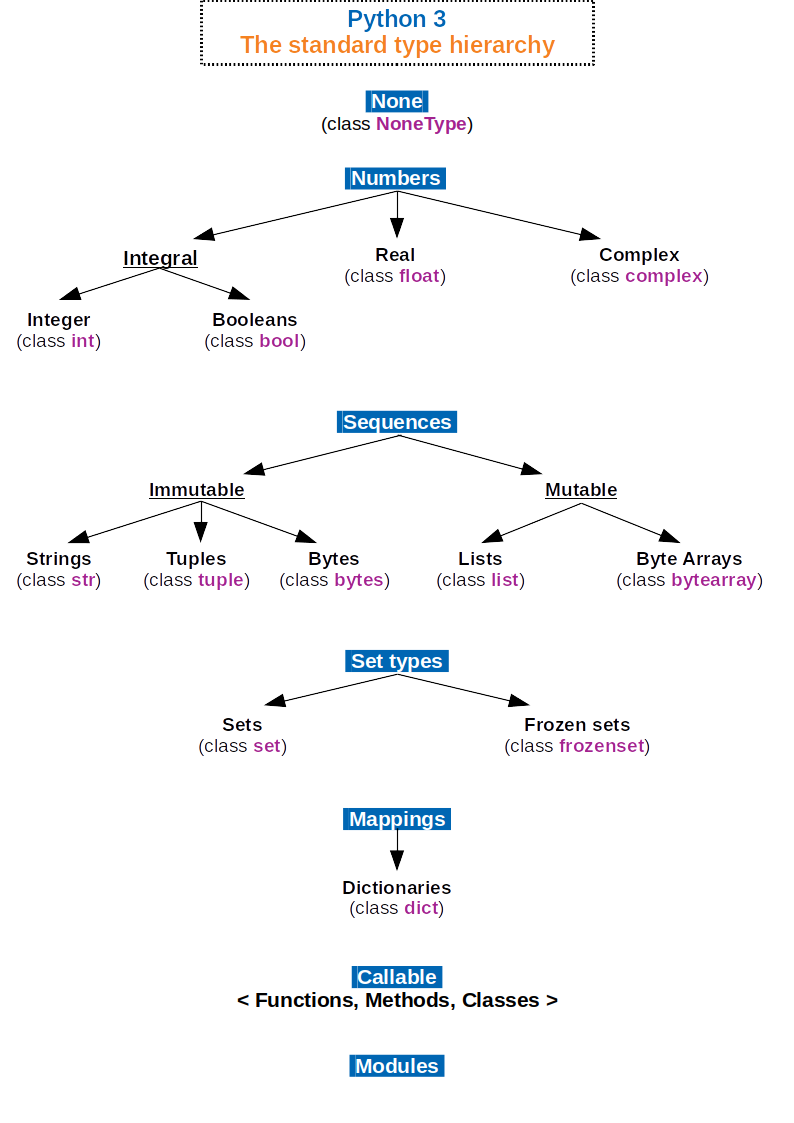
</div>

* `Python Standard Library` data structures

    is a collection of modules and packages included with Python that provides additional functionality beyond the built-in data structures.
    * `collections` module. Some of them:
        * `deque`: double-ended queue, optimized for fast appends and pops from both ends
        * `namedtuple`: creating tuple subclasses with named fields
        * `defaultdict`: alternative to built-in dictionaries
    * `heapq` module - implements a heap queue, also known as a priority queue
        * `heapq`
    * `array` module - implements an array data structure that is more space-efficient than lists
        * `array`
    * `bisect` module - provides utilities for operations on sorted lists
    * `queue` module - implements multi-producer, multi-consumer queues suitable for threading
        * `Queue`: FIFO queue
        * `LifoQueue`: Last-In-First-Out queue (stack)
        * `PriorityQueue`: queue where entries are kept sorted and retrieved in priority order

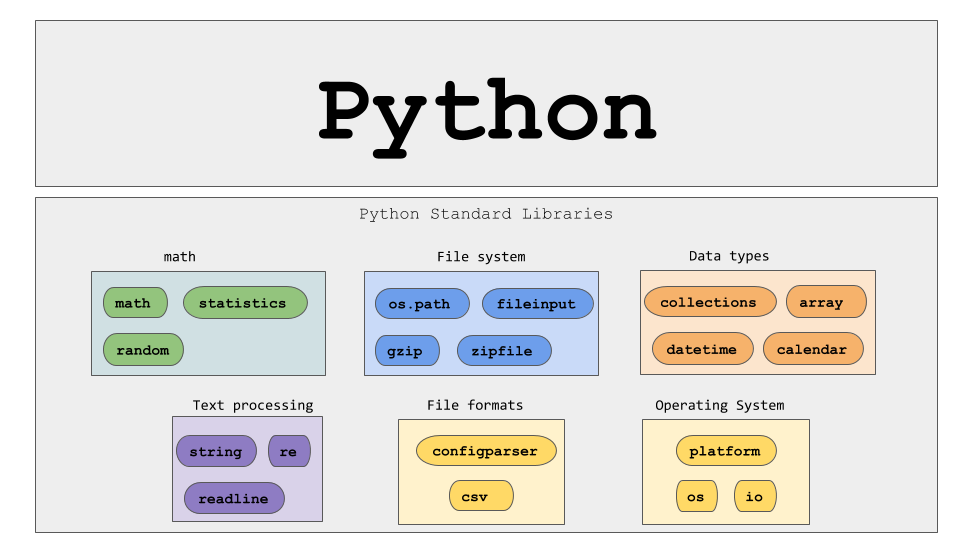

* third-party data structures
    
    Third-party libraries are are developed and maintained by the Python community and can be installed via `package managers` like `pip`. All libraries create their own data structures and algorithms, and many rely themselves on other third-party libraries
    * NumPy (`numpy`)
        * `ndarray`: N-dimensional array object for efficient numerical computations

    * Pandas (`pandas`)
        * `DataFrame`: 2-dimensional labeled data structure (aka a table with columns of any data type)
        * `Series`: 1-dimensional labeled array capable of holding any data type

    * NteworkX (`networkx`) - implements structures representing different types of graphs (undirected, directed, with multiple edges)
        * `Graph`
        * `DiGraph`
        * `MultiGraph`
        * `MultiDiGraph`

    * SortedContainers (`sortedcontainers`) - implements sorted versions of python's built-in types
        * `SortedList`
        * `SortedDict`
        * `SortedSet`

    * SciPy (`scipy`) - optimization, integration, interpolation, eigenvalue problems, algebraic equations, and more
        * sparse matrices (`scipy.sparse`): efficient storage formats for large, sparse matrices (matrices predominantly filled with zeros)
        * spatial data structures (`scipy.spatial`)
            * distance matrices (`scipy.spatial.distance`): structures that store pairwise distances between a set of points
            * KD-trees (`KDTree`), Ball trees (`BallTree`)

    * Sympy (`sympy`) - symbolic mathematics
        * symbolic expressions (`sympy.Expr`)
            * symbols (`symbols`): variables or constants in expressions
        * matrices (`sympy.Matrix`): symbolic matrix
        * polynomials (`sympy.Poly`)
        * operators
            * functions (`sympy.Function`)
            * derivatives (`sympy.Derivative`)
            * integrals (`sympy.integrals`)

    * scikit-learn (`sklearn`) - machine learning
        * estimators: classes like `Classifier`, `Regressor`
        * pipelines (`sklearn.pipeline.Pipeline`): sequentially applies a list of transforms and a final estimator, streamlining workflows
        * structures for handling feature names and labels: `sklearn.feature_extraction`, `sklearn.preprocessing`

    * TensorFlow (`tensorflow as tf`)
        * tensors (`tf.Tensor`): multi-dimensional arrays with a uniform type
        * variables (`tf.Variable`): tensors whose values can be changed during execution, typically used to store model parameters
        * datasets (`tf.data.Dataset`): high-level API for building complex input pipelines
        * graphs (`tf.Graph`): used in tf 1.x to define operations
        * layers and models (`tf.keras.layers`, `tf.keras.Model`)

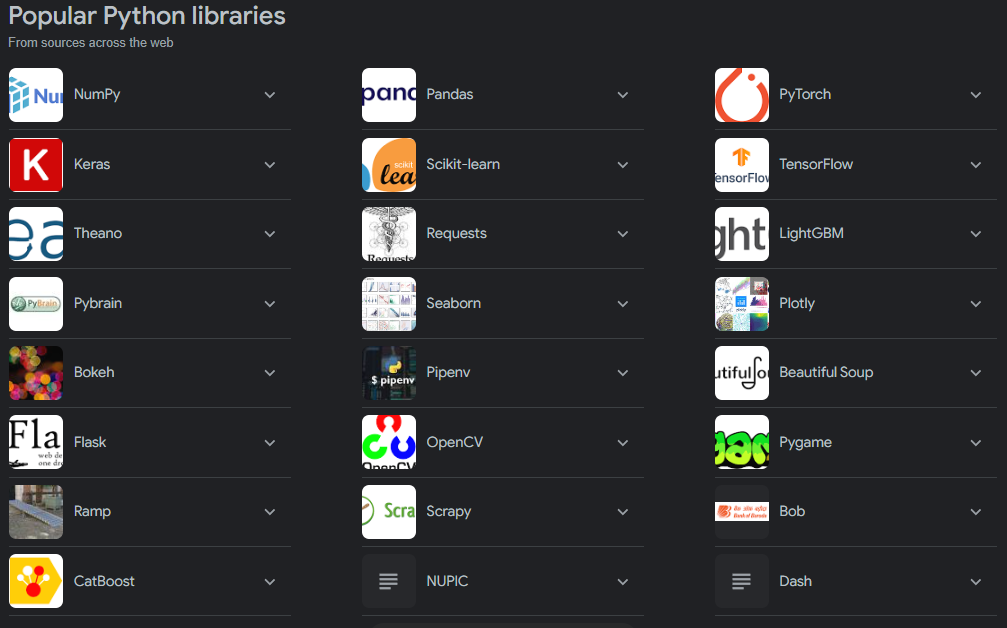

* https://github.com/vinta/awesome-python
* https://github.com/ml-tooling/best-of-ml-python

### Numeric

In [186]:
c = 10  # integer
print("c = 10 belongs to type:", type(c), "\n")  # <class 'int'>

c = 10 belongs to type: <class 'int'> 



In [30]:
type(-12 + 100)

int

In [31]:
type(0.55)

float

There are three distinct numeric types: integers, floating point numbers, and complex numbers. In addition, Booleans are a subtype of integers. Integers have unlimited precision. Floating point numbers are usually implemented using double in C; information about the precision and internal representation of floating point numbers for the machine on which your program is running is available in sys.float_info. Complex numbers have a real and imaginary part, which are each a floating point number. To extract these parts from a complex number z, use z.real and z.imag. (The standard library includes the additional numeric types fractions.Fraction, for rationals, and decimal.Decimal, for floating-point numbers with user-definable precision.)

Numbers are created by numeric literals or as the result of built-in functions and operators. Unadorned integer literals (including hex, octal and binary numbers) yield integers. Numeric literals containing a decimal point or an exponent sign yield floating point numbers. Appending 'j' or 'J' to a numeric literal yields an imaginary number (a complex number with a zero real part) which you can add to an integer or float to get a complex number with real and imaginary parts.

The constructors int(), float(), and complex() can be used to produce numbers of a specific type.

All numeric types (except complex) support the following operations (for priorities of the operations, see Operator precedence)
- addition `x + y`, sum of x and y
- subtraction `x − y`, difference of x and y
- multiplication `x ∗ y`, product of x and y
- division/quotient `x / y`, quotient of x and y
- integer division `x // y`, floored quotient of x and y
- module `x % y`, remainder of `x / y`
- negation `-x`, x negated
- `+x`, x unchanged
- absolute value or magnitude of x, `abs(x)`
- `complex(re, im)`, a complex number with real part re, imaginary part im. im defaults to zero.
- `c.conjugate()`, conjugate of the complex number c
- `divmod(x, y)`, the pair `(x // y, x % y)`
- exponentiation `pow(x, y)` or `x ∗∗ y`, x to the power y
- `int(x)`, x converted to integer
- `float(x)`, x converted to floating point

In [188]:
a = 0.00007  # float defined using decimal notation
a

7e-05

In [189]:
# 1.64 * 10^(-4)
b = 1.64e-4  # float defined using scientific notation
b

0.000164

In [190]:
b2 = 1.64 * 10**-4  # exponentiation operator ∗∗
b2

0.000164

In [32]:
type(3 + 12j)

complex

In [191]:
f = 1 + 3j  # j represents the imaginary unit j = sqrt(-1)
f

(1+3j)

In [193]:
d = complex(3, 4) # built-in function complex(a,b) creates the complex number a+b*j
d

(3+4j)

In [33]:
type(1j)

complex

In [198]:
# EXERCISE
a = 5.0 / 3
b = 1.645

use f-strings to format the printing of variable

Within the f-string, any variable can be enclosed inside curly brackets; for example, `print(f′{a}′)` will print the numerical value of the variable a, and `print(f′{a**2}′)` prints the numerical value of a2.

By using the f-string formats `print(f′{a:.3}′)`, `print(f′{a:.2e}′)`, `print(f′{a:.2f}′)` and `print(f′{a:g}′)`, we print the variable a using two decimals, using scientific notation, and as a float in generic notation, respectively.

In [199]:
# a) print a using scientific notation with two significant figures

In [201]:
a # not what i want

1.6666666666666667

In [202]:
print(f"Without formatting, the variable a={a}", "\n")

Without formatting, the variable a=1.6666666666666667 



In [203]:
print(f"Using scientific notation, the variable a={a:.2e}")

Using scientific notation, the variable a=1.67e+00


In [204]:
# b) print a^2 without any formatting and by using generic notation

In [205]:
print(f"Without formatting, the square of variable a is {a**2}")

Without formatting, the square of variable a is 2.777777777777778


In [208]:
print(
f"Using generic notation, the square of variable a is \
{a**2:g}"
)

Using generic notation, the square of variable a is 2.77778


In [209]:
# c) print b using two decimal points

In [210]:
print(f"Using two decimals, the variable b=1.645 is {b:.3}")

Using two decimals, the variable b=1.645 is 1.65


In [213]:
# round(a,2) and round(b,1)
print("round(a, 2) produces", round(a, 2))
print("round(b, 1) produces", round(b, 1))

round(a, 2) produces 1.67
round(b, 1) produces 1.6


### Boolean

In [194]:
is_active = True
type(is_active)

bool

In [ ]:
type(True)

In [ ]:
type(False)

In [ ]:
1 > 5

In [ ]:
1 == 1

**boolean variable naming**

* https://dev.to/michi/tips-on-naming-boolean-variables-cleaner-code-35ig

In [ ]:
isUsersOnline = True
areUsersOnline = True
# vs
isEveryUserOnline = True
isEachUserOnline = True
# vs
everyUserIsOnline = True
allUsersAreOnline = True

# NONE of these follow python's recommendations

There are a lot of different opinions on this. My preference is:
* it should read well/natural
* it should use the positive (rather than the negative)
* you should avoid including the type (even if this is a dynamically typed language). There's other mechanisms for that, like type annotations

When expressing logical conditions like "every," "each," "some," "one," and "all" in programming, it's helpful to map them to mathematical or logical concepts such as `universal quantification` (for all, $\forall$) and `existential quantification` (there exists, $\exists$).

<table><thead><tr><th>Term</th><th>Logic Symbol</th><th>Programming Function</th><th>Example Variable Name</th></tr></thead><tbody><tr><td>Every/Each</td><td>∀ (for all)</td><td><code>all()</code></td><td><code>isEveryUserOnline</code>, <code>allUsersAreOnline</code></td></tr><tr><td>Some/One or More</td><td>∃ (there exists)</td><td><code>any()</code></td><td><code>isSomeUserOnline</code>, <code>someUsersAreOnline</code></td></tr><tr><td>Exactly One</td><td>∃! (exactly one)</td><td><code>sum() == 1</code></td><td><code>isExactlyOneUserOnline</code></td></tr><tr><td>None</td><td>¬∃ (none exists)</td><td><code>not any()</code></td><td><code>noUsersAreOnline</code></td></tr></tbody></table>

In [7]:
# to exemplify this, i'll be using this class (classes are covered later on)
class User:
    def __init__(self, username, is_online=False):
        self.username = username
        self.is_online = is_online

    def __repr__(self):
        return f"User({self.username}, is_online={self.is_online})"        

In [8]:
# List of user objects
users = [
    User("Alice", is_online=True),
    User("Bob", is_online=False),
    User("Charlie", is_online=True),
    User("Diana", is_online=False)
]

* Every / Each / All

  These terms are used for universal quantification ($\forall$), meaning that the condition applies to every element in a set.

   In programming, this usually means looping through a collection and checking that all conditions are met for all elements.

In [9]:
# Check if all users are online
all_users_online = all(user.is_online for user in users)
# this means, "for every user in the set, the user is online"
# translated to a math statement, this is ∀x (x ∈ users → x.is_online = True)
all_users_online

# or you can name it these things
# all_users_are_online
# each_user_is_online
# every_user_online

# note that
# is_every_user_online
# has a type hint. Not everyone will like that (i don't)

False

* Some / (One or more) / (At least one)

    These terms are used for existential quantification ($\exists$), meaning that the condition applies to at least one element in a set.

    In programming, this is often expressed with an any() function or a similar logic that checks if at least one element meets the condition.

In [10]:
# Checks if at least one user is online
some_users_online = any(user.is_online for user in users)
# "there exists at least one user in the set who is online"
# ∃x (x ∈ users ∧ x.is_online = True)

* One / (Exactly One) / (Only one)

    used for checking if exactly one element in a set satisfies a condition.

In [11]:
# Checks if exactly one user is online
exactly_one_user_online = sum(user.is_online for user in users) == 1
# ∃!x (x ∈ users ∧ x.is_online = True)

* None / Zero

  means no elements in the set satisfy the condition, i.e., the set is empty or no elements meet the criteria.

In [12]:
# Checks if no user is online
no_users_online = not any(user.is_online for user in users)
# "there is no user who is online"
# ¬∃x (x ∈ users ∧ x.is_online = True)

### Sequence types

#### Strings

string literals are defined between quotes/apostrophes

In [196]:
e = "some text"
e

'some text'

In [197]:
type(e)

str

In [ ]:
'Single quotes'

In [ ]:
"Double quotes"

In [ ]:
primavera = """
Triple quotes - multiline

Alberto Caeiro
Quando vier a Primavera,

Quando vier a Primavera,
Se eu já estiver morto,
As flores florirão da mesma maneira
E as árvores não serão menos verdes que na Primavera passada.
A realidade não precisa de mim.
Sinto uma alegria enorme
Ao pensar que a minha morte não tem importância nenhuma.
Se soubesse que amanhã morria
E a Primavera era depois de amanhã,
Morreria contente, porque ela era depois de amanhã.
Se esse é o seu tempo, quando havia ela de vir senão no seu tempo?
Gosto que tudo seja real e que tudo esteja certo;
E gosto porque assim seria, mesmo que eu não gostasse.
Por isso, se morrer agora, morro contente,
Porque tudo é real e tudo está certo.
Podem rezar latim sobre o meu caixão, se quiserem.
Se quiserem, podem dançar e cantar à roda dele.
Não tenho preferências para quando já não puder ter preferências.
O que for, quando for, é que será o que é.
"""

In [ ]:
print(primavera) # printing is needed for propper formating of strings

In [ ]:
"I've always wanted to be a cat but no meow meow for me"

In [ ]:
a = 'Hello World'

In [ ]:
a[0]

In [ ]:
a[:5]

In [ ]:
a[-1]

In [ ]:
a[2:5]

In [ ]:
print(a + "\nAnd Goodbye!") # string concatenation

**escape sequences**

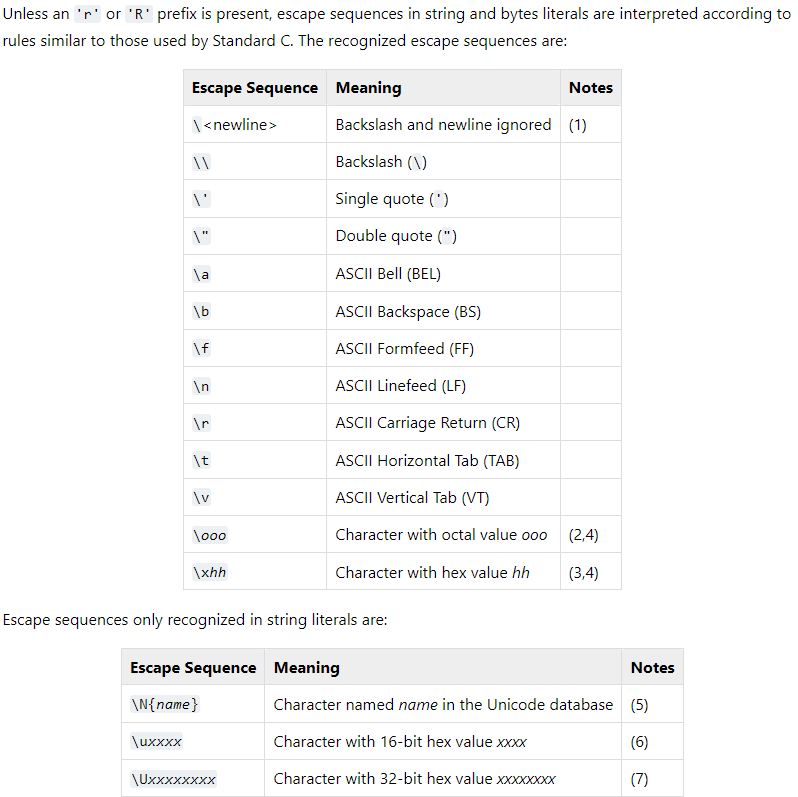

https://docs.python.org/3/reference/lexical_analysis.html#escape-sequences

**f-strings**

A formatted string literal or `f-string` is a string literal that is prefixed with 'f' or 'F'. These strings may contain replacement fields, which are expressions delimited by curly braces {}. While other string literals always have a constant value, formatted strings are really expressions evaluated at run time.

In [20]:
# embedding variables

name = "Alice"
age = 30
print(f"My name is {name} and I am {age} years old.")

My name is Alice and I am 30 years old.


In [21]:
# inline expressions

num = 5
print(f"The square of {num} is {num ** 2}.")

The square of 5 is 25.


In [24]:
# formatting numbers

import math

print(math.pi)
print(f"Pi rounded to 2 decimal places: {math.pi:.2f}")


# formatting integers with leading zeros

number = 42
print(f"{number:05}")  # Five characters wide, padded with zeros

3.141592653589793
Pi rounded to 2 decimal places: 3.14
00042


In [26]:
# date and time formatting

from datetime import datetime
now = datetime.now()
print(f"Current date and time: {now:%Y-%m-%d %H:%M:%S}")

Current date and time: 2024-10-17 17:36:08


In [27]:
# padding and aligning strings

name = "Alice"
print(f"|{name:<10}|")  # Left-align
print(f"|{name:>10}|")  # Right-align
print(f"|{name:^10}|")  # Center-align

|Alice     |
|     Alice|
|  Alice   |


#### Range sequences

`range(a:b:step)`, where a, b and step are integers

sequence of integers from a to b (excluding b), incremented by the
variable step.

In [239]:
# Exercise
a = range(1, 7, 2)

In [240]:
# a) convert an object range into a list
list(a)

[1, 3, 5]

In [241]:
# b) operations on a range
# maximum element, the sum of the elements and the length

print("max(a) gives: ", max(a))
print("sum(a) gives: ", sum(a))
print("len(a) gives: ", len(a))

max(a) gives:  5
sum(a) gives:  9
len(a) gives:  3


#### Lists

mutable

In [ ]:
[1, 2, 3] # defined using rectangle/square brackets

In [ ]:
['another', 'day', '...']

In [141]:
x, y, z = 'Choco', 'Vanilla', 'Blueberry'
icecreams = [x, y, z]

icecreams.append('Caramel') # appending to a list
icecreams

['Choco', 'Vanilla', 'Blueberry', 'Caramel']

**acessing and setting values**

In [142]:
icecreams[0] = 'Strawberry'
icecreams

['Strawberry', 'Vanilla', 'Blueberry', 'Caramel']

In [146]:
if 'Vanilla' in icecreams:
    print('vanilla is in there')

vanilla is in there


lists are indexed starting at 0. We can access the elements of a list by their index

eg. `print(a[0])` prints the first element in list a

use negative indices to access elements starting from the end of the list

eg. `print(a[-1])` prints the last element in the list

lists are mutable (they can be altered), so we can redefine any of the elements in the list

eg.  `a[-1] = -2` sets the last element of the list to −2

**slicing lists**

define sub-lists called slices `a[start:end:step]`

eg. the slice `a[2:5:2]` starts at index 2 and increases by a step of 2 taking every
second element in the list, but does not include the ending value 5 of the index.

In [ ]:
nested_list = ['gamer', [1, True]] # nested list
nested_list

In [ ]:
nested_list[1][1]

In [226]:
# EXERCISE
a = [2,[3,0],5,[1,1,2],'s',[1,4],2,5]

In [227]:
# a) add the first and last element in this list
a[0]+a[-1]

7

In [228]:
# b) set the third element to -2
a[2] = -2

In [229]:
# c) a[3][2] element of the list
a[3][2]

2

In [230]:
# d) create a new list which starts from the third element in list a, and contains every third element of a
a[2:len(a):2]

[-2, 's', 2]

In [231]:
# e) new list that contains the first five elements of a
a[:5]

[2, [3, 0], -2, [1, 1, 2], 's']

In [147]:
a = ['a', 'b', 'c']
a[3] # IndexError

IndexError: list index out of range

In [150]:
names = ["foo", "bar", "baz", "qux"]
names[::2]

['foo', 'baz']

**unpacking a list**

eg. `a, b, c = [1,2,3]` stores the value of 1 in the variable a, the value of 2 in b, and the value of 3 in c

**counting**

In [155]:
stuff = [1, 1, 2, 3, 'ric']

In [156]:
stuff.count(1)

2

In [157]:
stuff.count('ric')

1

**copying**

lists are copied by reference by default. This means that when you assign a list to a new variable, both variables will point to the same list object in memory. Any changes made to the list through one variable will be reflected in the other.

eg. `b = a` does not create a new list b from list a, but simply makes a reference to a. By setting `a[0] = 1`, this automatically sets also the first element of list b to 1.

If you want to create a copy of a list that is independent of the original list, you need to create a shallow copy or a deep copy, depending on your needs. A shallow copy creates a new list object, but the elements of the list are still references to the same objects as in the original list. A deep copy creates a new list object and recursively copies all objects found in the original list. This ensures that the new list is completely independent of the original list, even for nested lists.

In [232]:
# default copy
c = [1,[2,3],4]
d = c
d[1] = 0
print(c,d)

[1, 0, 4] [1, 0, 4]


In [233]:
# shallow copy with copy()
original_list = [1, 2, 3]
shallow_copy = original_list.copy()

shallow_copy.append(4)

print("Original List:", original_list)  # Output: [1, 2, 3]
print("Shallow Copy:", shallow_copy)    # Output: [1, 2, 3, 4]

Original List: [1, 2, 3]
Shallow Copy: [1, 2, 3, 4]


In [234]:
# shallow copy with slicing
original_list = [1, 2, 3]
shallow_copy = original_list[:]

shallow_copy.append(4)

print("Original List:", original_list)  # Output: [1, 2, 3]
print("Shallow Copy:", shallow_copy)    # Output: [1, 2, 3, 4]

Original List: [1, 2, 3]
Shallow Copy: [1, 2, 3, 4]


In [237]:
# shallow copy using the copy module
import copy
original_list = [1, 2, 3]
new_list = copy.copy(original_list)

In [238]:
# deep copy using the copy module
original_list = [[1, 2], [3, 4]]
deep_copy = copy.deepcopy(original_list)

deep_copy[0].append(5)

print("Original List:", original_list)  # Output: [[1, 2], [3, 4]]
print("Deep Copy:", deep_copy)          # Output: [[1, 2, 5], [3, 4]]

Original List: [[1, 2], [3, 4]]
Deep Copy: [[1, 2, 5], [3, 4]]


**list comprehensions**

`[expression for item in sequence]`

eg. `[u**2 for u in [1,2,3]]`, sequence with the squares of the integer sequence `[1,2,3]`

eg. `[x%4 for x in range(0,12)]`, periodic sequence of (0,1,2,3) and length 12

In [242]:
b = [u**3 for u in [1, 2, 3]]
b

[1, 8, 27]

In [243]:
f = [x % 3 for x in range(0, 12)]
f

[0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]

#### Tuple

immutable

In [ ]:
a = (1,2,3,2,1)
a

In [ ]:
type(a)

In [ ]:
a[1]

In [ ]:
a.append(3) # cannot change it!

### Set types

no duplicates, no garanteed order

In [158]:
a = {1, 2, 3, 3} # defined using "squigly"/curly brackets
a

{1, 2, 3}

In [159]:
type(a)

set

A set object is an unordered collection of distinct hashable objects. Common uses include membership testing, removing duplicates from a sequence, and computing mathematical operations such as intersection, union, difference, and symmetric difference.

There are currently two built-in set types, `set` and `frozenset`. The set type is mutable — the contents can be changed using methods like add() and remove(). Since it is mutable, it has no hash value and cannot be used as either a dictionary key or as an element of another set. The frozenset type is immutable and hashable — its contents cannot be altered after it is created; it can therefore be used as a dictionary key or as an element of another set.

In [ ]:
b = {2, 5, 0}

a | b # inclusive OR, using a bar

In [ ]:
a ^ b # exclusive OR, using a carret. The elements in one set or the other but not in both

In [ ]:
a & b # AND, using a ampersand

In [ ]:
a - b # DIFFERENCE

In [ ]:
b - a

### Mapping types - Dictionaries

key-value pairs

In [120]:
player = {'name': 'Ric', 'health': 100, 'skills': ['sleep']}
player

{'name': 'Ric', 'health': 100, 'skills': ['sleep']}

**get all values, keys and items**

In [121]:
player.values()

dict_values(['Ric', 100, ['sleep']])

In [122]:
player.keys()

dict_keys(['name', 'health', 'skills'])

In [123]:
player.items()

dict_items([('name', 'Ric'), ('health', 100), ('skills', ['sleep'])])

this is useful for looping

In [135]:
for e in player.values():
    print(e)

Ric
80
['yawn', 'sleep']
173


In [136]:
if 'sleep' in player['skills']:
    print('this player has op skill sleep')

this player has op skill sleep


A mapping object maps hashable values to arbitrary objects. Mappings are mutable objects. There is currently only one standard mapping type, the dictionary.

**get value**

In [125]:
player['name']

'Ric'

In [124]:
player[0] # this on't work because 0 is not a key in this dic

KeyError: 0

a safer way

In [131]:
player.get('name')

'Ric'

In [133]:
# default to a value

player.get('money', 'default value')

'default value'

In [134]:
player.get(0, 'key doesn\'t exist')

"key doesn't exist"

**update values**

In [126]:
player['name'] = 'Ricardo'
player

{'name': 'Ricardo', 'health': 100, 'skills': ['sleep']}

In [129]:
player.update({'name': 'Ric', 'health': 80, 'skills': ['yawn', 'sleep'], 'height (in cm)': 173})
player

{'name': 'Ric',
 'health': 80,
 'skills': ['yawn', 'sleep'],
 'height (in cm)': 173}

**remove key-pairs**

In [ ]:
del player['height (in cm)']
player

**numeric keys**

keys can also be numbers

In [104]:
# define a dictionary for grading
grade_mapping = {
    90: 'A',
    80: 'B',
    70: 'C',
    60: 'D',
    0: 'F'  # F for any score below 60
}

In [108]:
grade_mapping[80]

'B'

In [105]:
def get_letter_grade(numeric_grade):
    
    # Iterate through the sorted keys in descending order
    for grade in sorted(grade_mapping.keys(), reverse=True):
        if numeric_grade >= grade:
            return grade_mapping[grade]
    return 'Invalid Grade'  # If the grade is not within the range

In [106]:
grades_to_test = [95, 82, 67, 55, 45]

for grade in grades_to_test:
    letter_grade = get_letter_grade(grade)
    print(f"Numeric Grade: {grade} -> Letter Grade: {letter_grade}")

Numeric Grade: 95 -> Letter Grade: A
Numeric Grade: 82 -> Letter Grade: B
Numeric Grade: 67 -> Letter Grade: D
Numeric Grade: 55 -> Letter Grade: F
Numeric Grade: 45 -> Letter Grade: F


beyond the gain in performance, this is kind of a dubious example. More real use cases are:
* to count frequencies
* mapping settings or options, status codes

In [109]:
from collections import defaultdict

# Count occurrences of numbers
number_counts = defaultdict(int)
numbers = [1, 2, 2, 3, 1, 4, 4, 4]

for number in numbers:
    number_counts[number] += 1

print(dict(number_counts))  # Output: {1: 2, 2: 2, 3: 1, 4: 3}

{1: 2, 2: 2, 3: 1, 4: 3}


In [110]:
# Representing different settings
settings = {
    1: "Dark Mode",
    2: "Notifications Enabled",
    3: "Auto-Update",
}

# Accessing a specific setting
setting_id = 2
print(f"Setting {setting_id}: {settings[setting_id]}")  # Output: Setting 2: Notifications Enabled

Setting 2: Notifications Enabled


**operations between dics**

In [140]:
# merging
dic1 = {'a': 1, 'b': 2}
dic2 = {'c': 1, 'd': 34, 'b': 3}

dic1 | dic2

{'a': 1, 'b': 3, 'c': 1, 'd': 34}

**hash**

dictionaries in Python are implemented as `hash tables`. This means that they use `hash functions` to map keys to their corresponding values. Hash functions map data of arbitrary size to fixed-size values (hashes), which are commonly used for data integrity checks, efficient data retrieval, and cryptographic applications.

In [78]:
# hash() can be used to get the hash value of an object

print(hash("Hello, World!"))  # Hash value of a string
print(hash(42))                # Hash value of an integer
print(hash((1, 2, 3)))         # Hash value of a tuple

-492333684890739662
42
529344067295497451


there's also the `hashlib` module for cryptographic hashes

In [79]:
import hashlib

# Example of hashing a string with SHA-256
data = "Hello, World!"
hashed_data = hashlib.sha256(data.encode()).hexdigest()

print(f"Original data: {data}")
print(f"SHA-256 Hash: {hashed_data}")

# encode() converts the string into bytes, which is necessary for hashing
# hexdigest() returns the digest of the data as a hexadecimal string

Original data: Hello, World!
SHA-256 Hash: dffd6021bb2bd5b0af676290809ec3a53191dd81c7f70a4b28688a362182986f


In [80]:
def hash_password(password: str) -> str:
    # Hash the password using SHA-256
    return hashlib.sha256(password.encode()).hexdigest()

# Store a password securely
password = "my_secure_password"
hashed_password = hash_password(password)

print(f"Original password: {password}")
print(f"Hashed password: {hashed_password}")

Original password: my_secure_password
Hashed password: 2c9a8d02fc17ae77e926d38fe83c3529d6638d1d636379503f0c6400e063445f


the key in a dictionary must be `hashable` because they need to be unique

In [137]:
library = {
    "lotr": '3F-48', # these are meant to be library position identification codes, like 3rd floor, 48
    "little prince": '2F-B48',
    "lotr": 'this is a repeated definition....',
}

In [138]:
library['lotr']

'this is a repeated definition....'

In [88]:
dog = {
    'name': 'Fluffy',
    'age': 5
}

In [82]:
# accessing values using keys
dog['name']

'Fluffy'

In [83]:
# but i can't do this because strings are not hashable
# Trying to access using dot notation will result in an AttributeError

dog.name

AttributeError: 'dict' object has no attribute 'name'

The `dot notation` (object.attribute) is generally used for attributes of class instances, not for dictionary keys.
In Python, only certain types (like numbers, strings, and tuples) are considered hashable. This means they can be used as keys in a dictionary because their hash value will not change over their lifetime.

If i want to access attributes using dot notation, i have these options:
* use a class (discussed in the classes section)
* use a `named tuple` (discussed here)
* use a enum (discussed in the enums section)

In [89]:
from collections import namedtuple

# Define a namedtuple for Dog
Dog = namedtuple('Dog', ['name', 'age'])

# Create an instance of Dog
dog = Dog(name='Fluffy', age=5)

# Accessing attributes using dot notation
print(dog.name)  # Output: Fluffy
print(dog.age)   # Output: 5

Fluffy
5


### Other object types

* Functions
* Context Manager types
* Type Annotation types
    * Generic Alias
    * Union
* Module type

### classes and objects

#### definition and instanciation

for classes, Python recommends the PascalCase convention!

In [63]:
class Person:
    pass

In [64]:
# instantiate (create an instance of) the class

a_person_instance = Person()
a_person_instance 

In [65]:
# this is the representation of the object
# it means it is comming from the main module and the Person class
# and lives at that memory address

repr(a_person_instance)

'<__main__.Person object at 0x0000018F3BAA5AE0>'

#### properties

adding `properties` to a class

In [30]:
class Person:
    first_name = "ric"
    last_name = "cir"

In [35]:
Person.first_name

'ric'

In [36]:
Person.last_name

'cir'

In [37]:
Person.mro

<function Person.mro()>

In [32]:
person = Person()
person

In [48]:
type(person)

__main__.Person

In [33]:
person.first_name

'ric'

In [34]:
person.last_name

'cir'

In [38]:
person.first_name = 'new name'

In [39]:
print(person.first_name)
print(Person.first_name)

new name
ric


#### methods

functions aka `methods` inside a class. The first parameter that is passed into a function inside a class (by convention named `self` represents the object itself)

In [42]:
class Person:
    first_name = "ric"
    last_name = "cir"
    
    def full_name(self):
        return f"{self.first_name} {self.last_name}"

In [43]:
person = Person()
person.full_name()

'ric cir'

#### constructors

in Python the constructor function is the method `__init__`

In [44]:
class Person:
    def __init__(self, name):
        self.name = name

    def greet(self):
        return f"Hello, my name is {self.name}"

In [45]:
alice = Person("Alice")
alice

In [47]:
alice.greet()

'Hello, my name is Alice'

In [169]:
class Person:
    # this is not need
    first_name = ""
    last_name = ""
    
    def __init__(self, first_name, last_name):
        self.first_name = first_name
        self.last_name = last_name
    
    def full_name(self):
        return f"{self.first_name} {self.last_name}"

In [170]:
alice = Person("Alice", "Wonderlander")
alice.full_name()

'Alice Wonderlander'

In [171]:
alice.first_name

'Alice'

In [55]:
ulice = Person(first_name = "Ulice", last_name = "Wanderluster")
ulice.full_name()

'Ulice Wanderluster'

In [56]:
mlice = Person(last_name = "Breakbuster", first_name = "Malice")
mlice.full_name()

'Malice Breakbuster'

#### private variable convention

you use 2 underscores (`__`) as a convention to denote private properties

In [166]:
class Person:
    def __init__(self, first_name, last_name):
        self.__first_name = first_name
        self.__last_name = last_name
    
    def full_name(self):
        return f"{self.__first_name} {self.__last_name}"

In [167]:
alice = Person("Alice", "Wonderlander")
alice.full_name()

'Alice Wonderlander'

In [168]:
alice.__first_name # can't do this!

AttributeError: 'Person' object has no attribute '__first_name'

to access it from the outside, we add a `getter`and `setter`

In [9]:
class Person:
    def __init__(self, first_name, last_name):
        self.__first_name = first_name
        self.__last_name = last_name
    
    def full_name(self):
        return f"{self.__first_name} {self.__last_name}"
    
    # this is the getter
    @property
    def first_name(self):
        return self.__first_name
    
    # this is the setter
    @first_name.setter
    def first_name(self, new_value):
        if new_value == "João":
            raise ValueError('"João" is not allowed.')
        else:
            self.__first_name = new_value

In [10]:
alice = Person("Alice", "Wonderlander")
alice.first_name

'Alice'

In [11]:
alice.first_name = 'maria'
alice.first_name

'maria'

In [16]:
# there's no guard against this in the constructir
joao = Person("João", "whatever")
joao.first_name

'João'

In [15]:
# but the setter works
joao.first_name = 'João'

ValueError: "João" is not allowed.

#### string and repl representation

the `__str__` method is used to get a string representation of the object...

In [59]:
# without __str__ defined

class Person:
    def __init__(self, name: str, age: int):
        self.name = name
        self.age = age

person = Person("Alice", 30)

print(person)

In [60]:
class Person:
    def __init__(self, name: str, age: int):
        self.name = name
        self.age = age

    # Define the __str__ method to return a user-friendly string representation
    def __str__(self) -> str:
        return f"Person(name={self.name}, age={self.age})"


person = Person("Alice", 30)

# Print the object, which will use the __str__ method
print(person)

Person(name=Alice, age=30)


the `__repl__` changes the representation of the object

In [66]:
class Point:
    def __init__(self, x: float, y: float):
        self.x = x
        self.y = y

    def __repr__(self) -> str:
        return f"Point(x={self.x}, y={self.y})"

point = Point(3.0, 4.0)

# Using repr() to get the string representation
print(repr(point))  # Output: Point(x=3.0, y=4.0)

# Alternatively, just typing the variable name in an interactive shell will call __repr__ automatically
point

Point(x=3.0, y=4.0)


Point(x=3.0, y=4.0)

#### checking membership

The `isinstance()` function is used to check if an object is an instance or subclass of a particular class or a tuple of classes. It returns True if the object is an instance of the specified class(es), and False otherwise

In [77]:
# Checking types of built-in data types
number = 42
text = "Hello, World!"
numbers_list = [1, 2, 3]

print(isinstance(number, int))         # Output: True
print(isinstance(text, str))           # Output: True
print(isinstance(numbers_list, list))   # Output: True
print(isinstance(number, (float, str))) # Output: False

True
True
True
False


In [90]:
class Dog:
    def __init__(self, name: str, age: int):
        self.name = name
        self.age = age

dog = Dog(name='Fluffy', age=5)

# Accessing attributes using dot notation
print(dog.name)  # Output: Fluffy
print(dog.age)   # Output: 5

Fluffy
5


however, a possible problem with this is it doesn't limit the values that you can assign to the member variables

#### inheritance

use `isinstance` to check for class membership

In [76]:
class Animal:
    pass

class Dog(Animal):
    pass

class Cat(Animal):
    pass

# Create instances of Dog and Cat
dog = Dog()
cat = Cat()

# Using isinstance to check types
print(isinstance(dog, Dog))       # Output: True
print(isinstance(cat, Cat))       # Output: True
print(isinstance(dog, Animal))    # Output: True
print(isinstance(cat, Animal))    # Output: True

# Check against a non-related class
print(isinstance(dog, str))       # Output: False
print(isinstance(cat, (Dog, str))) # Output: False # checks if cat is an instance of either Dog or str

True
True
True
True
False
False


In [18]:
# define a base class

class Plant:
    def __init__(self, name: str, height: float):
        self.name = name          # Common attribute
        self.height = height      # Common attribute

    def photosynthesize(self):
        return f"{self.name} is photosynthesizing."

    def grow(self, amount: float):
        self.height += amount
        return f"{self.name} has grown to {self.height:.2f} meters tall."

In [19]:
# define derived classes

class Flower(Plant):
    def __init__(self, name: str, height: float, color: str):
        super().__init__(name, height)  # Initialize the base class
        self.color = color               # Specific attribute for flowers

    def bloom(self):
        return f"{self.name} is blooming with {self.color} petals."


class Tree(Plant):
    def __init__(self, name: str, height: float, type_of_tree: str):
        super().__init__(name, height)  # Initialize the base class
        self.type_of_tree = type_of_tree # Specific attribute for trees

    def shed_leaves(self):
        return f"{self.name} is shedding its leaves."


class Shrub(Plant):
    def __init__(self, name: str, height: float, type_of_shrub: str):
        super().__init__(name, height)  # Initialize the base class
        self.type_of_shrub = type_of_shrub # Specific attribute for shrubs

    def prune(self):
        return f"{self.name} has been pruned."

In [21]:
rose = Flower(name="Rose", height=0.5, color="red")
oak = Tree(name="Oak", height=20.0, type_of_tree="deciduous")
boxwood = Shrub(name="Boxwood", height=1.5, type_of_shrub="evergreen")

# Using the Flower instance
print(rose.photosynthesize())    # Inherited method
print(rose.bloom())              # Flower-specific method
print(rose.grow(0.1))            # Inherited method

print()  # New line for readability

# Using the Tree instance
print(oak.photosynthesize())     # Inherited method
print(oak.shed_leaves())         # Tree-specific method
print(oak.grow(0.5))             # Inherited method

print()  # New line for readability

# Using the Shrub instance
print(boxwood.photosynthesize()) # Inherited method
print(boxwood.prune())           # Shrub-specific method
print(boxwood.grow(0.2))         # Inherited method

Rose is photosynthesizing.
Rose is blooming with red petals.
Rose has grown to 0.60 meters tall.

Oak is photosynthesizing.
Oak is shedding its leaves.
Oak has grown to 20.50 meters tall.

Boxwood is photosynthesizing.
Boxwood has been pruned.
Boxwood has grown to 1.70 meters tall.


**polymorphism**

In [28]:
# eg. polymorphic function

def print_type(v):
    print(type(v))

In [26]:
print_type(1)

<class 'int'>


In [27]:
print([1, 2, 3])

[1, 2, 3]


Polymorphism allows objects of different classes to be treated as objects of a common base class, even if their behavior differs.

In [29]:
class Planet:
    def __init__(self, name: str, mass: float, radius: float):
        self.name = name
        self.mass = mass  # in kg
        self.radius = radius  # in km
    
    def orbit(self):
        """Method to simulate the planet orbiting its star."""
        return f"{self.name} is orbiting the star."

    def gravity(self):
        """Method to calculate the gravitational force of the planet."""
        # Gravitational constant G = 6.674 × 10^(-11) m^3 kg^(-1) s^(-2)
        G = 6.674 * (10 ** -11)
        # Gravity = G * (mass / radius^2), simplified for this example
        return G * (self.mass / (self.radius * 1000) ** 2)

    def describe(self):
        """General description of the planet."""
        return f"Planet {self.name}: Mass = {self.mass} kg, Radius = {self.radius} km."

In [30]:
class GasGiant(Planet):
    def __init__(self, name: str, mass: float, radius: float, atmosphere: str):
        super().__init__(name, mass, radius)
        self.atmosphere = atmosphere  # Specific to gas giants

    def orbit(self):
        return f"{self.name}, a gas giant, is orbiting its star majestically."

    def describe(self):
        return f"{self.name} is a gas giant with an atmosphere of {self.atmosphere}. Mass: {self.mass} kg, Radius: {self.radius} km."


class TerrestrialPlanet(Planet):
    def __init__(self, name: str, mass: float, radius: float, has_life: bool):
        super().__init__(name, mass, radius)
        self.has_life = has_life  # Specific to terrestrial planets

    def orbit(self):
        return f"{self.name}, a terrestrial planet, is orbiting its star."

    def describe(self):
        life_status = "supports life" if self.has_life else "does not support life"
        return f"{self.name} is a terrestrial planet that {life_status}. Mass: {self.mass} kg, Radius: {self.radius} km."

In [31]:
jupiter = GasGiant(name="Jupiter", mass=1.898 * (10**27), radius=69911, atmosphere="Hydrogen and Helium")
earth = TerrestrialPlanet(name="Earth", mass=5.972 * (10**24), radius=6371, has_life=True)
mars = TerrestrialPlanet(name="Mars", mass=6.417 * (10**23), radius=3389, has_life=False)

# List of planets (demonstrating polymorphism)
planets = [jupiter, earth, mars]

# Loop over the planets and call their methods (polymorphism in action)
for planet in planets:
    print(planet.orbit())        # Calls the overridden orbit method
    print(planet.describe())     # Calls the overridden describe method
    print(f"Gravity on {planet.name}: {planet.gravity():.2e} m/s²")  # Calls the inherited gravity method
    print()

Jupiter, a gas giant, is orbiting its star majestically.
Jupiter is a gas giant with an atmosphere of Hydrogen and Helium. Mass: 1.898e+27 kg, Radius: 69911 km.
Gravity on Jupiter: 2.59e+01 m/s²

Earth, a terrestrial planet, is orbiting its star.
Earth is a terrestrial planet that supports life. Mass: 5.972e+24 kg, Radius: 6371 km.
Gravity on Earth: 9.82e+00 m/s²

Mars, a terrestrial planet, is orbiting its star.
Mars is a terrestrial planet that does not support life. Mass: 6.416999999999999e+23 kg, Radius: 3389 km.
Gravity on Mars: 3.73e+00 m/s²



In [223]:
# Exercise
# Number guessing game

In [224]:
import random

# Define a Game class
class NumberGuessingGame:
    def __init__(self, lower=1, upper=100):
        # Initialize game parameters
        self.lower = lower
        self.upper = upper
        self.number_to_guess = random.randint(self.lower, self.upper)
        self.guess_count = 0

    def play(self):
        print(f"Welcome to the Number Guessing Game!")
        print(f"Guess a number between {self.lower} and {self.upper}")

        while True:
            try:
                # Get user's guess
                guess = int(input("Enter your guess: "))
                self.guess_count += 1

                # Check if guess is correct
                if guess < self.number_to_guess:
                    print("Too low! Try again.")
                elif guess > self.number_to_guess:
                    print("Too high! Try again.")
                else:
                    print(f"Congratulations! You guessed the number in {self.guess_count} attempts.")
                    break
            except ValueError:
                print("Please enter a valid number!")

    def reset(self):
        # Reset the game to allow a new round
        self.number_to_guess = random.randint(self.lower, self.upper)
        self.guess_count = 0
        print("\nGame reset. Let's play again!")

In [225]:
game = NumberGuessingGame()
game.play()

# Reset and play again if you want to
# game.reset()
# game.play()

Welcome to the Number Guessing Game!
Guess a number between 1 and 100
Enter your guess: 80
Too high! Try again.
Enter your guess: 50
Too low! Try again.
Enter your guess: 60
Too low! Try again.
Enter your guess: 65
Too low! Try again.
Enter your guess: 75
Congratulations! You guessed the number in 5 attempts.


#### abstract classes

An abstract class is a class you don't want to instantiate, but only serve has a scaffold. ABC (Abstract Base class) is the class you will subclass to create a abstract class

In [160]:
import abc

In [162]:
# define the abstract class Car
class Car(abc.ABC):
    def __init__(self, make: str, model: str, year: int):
        self.make = make
        self.model = model
        self.year = year
        self.engine_running = False

    @abc.abstractmethod
    def start_engine(self):
        """Start the car engine."""
        pass

    @abc.abstractmethod
    def stop_engine(self):
        """Stop the car engine."""
        pass

    @abc.abstractmethod
    def drive(self):
        """Drive the car."""
        pass

In [163]:
# create two concrete classes

class ElectricCar(Car):
    def start_engine(self):
        self.engine_running = True
        print(f"{self.make} {self.model} (Electric) engine started.")

    def stop_engine(self):
        self.engine_running = False
        print(f"{self.make} {self.model} (Electric) engine stopped.")

    def drive(self):
        if self.engine_running:
            print(f"Driving the {self.make} {self.model} (Electric).")
        else:
            print("Start the engine first!")

class GasCar(Car):
    def start_engine(self):
        self.engine_running = True
        print(f"{self.make} {self.model} (Gas) engine started.")

    def stop_engine(self):
        self.engine_running = False
        print(f"{self.make} {self.model} (Gas) engine stopped.")

    def drive(self):
        if self.engine_running:
            print(f"Driving the {self.make} {self.model} (Gas).")
        else:
            print("Start the engine first!")

In [164]:
tesla = ElectricCar(make="Tesla", model="Model S", year=2023)
ford = GasCar(make="Ford", model="Mustang", year=2022)

# Use the ElectricCar instance
tesla.start_engine()
tesla.drive()
tesla.stop_engine()

print()  # New line for readability

# Use the GasCar instance
ford.start_engine()
ford.drive()
ford.stop_engine()

Tesla Model S (Electric) engine started.
Driving the Tesla Model S (Electric).
Tesla Model S (Electric) engine stopped.

Ford Mustang (Gas) engine started.
Driving the Ford Mustang (Gas).
Ford Mustang (Gas) engine stopped.


### enumerations

https://docs.python.org/3/library/enum.html

In [67]:
import enum

In [72]:
dir(enum)

['DynamicClassAttribute',
 'Enum',
 'EnumMeta',
 'Flag',
 'IntEnum',
 'IntFlag',
 'MappingProxyType',
 '_EnumDict',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_auto_null',
 '_decompose',
 '_high_bit',
 '_is_descriptor',
 '_is_dunder',
 '_is_private',
 '_is_sunder',
 '_make_class_unpicklable',
 '_reduce_ex_by_name',
 'auto',
 'sys',
 'unique']

In [68]:
enum.Enum

<enum 'Enum'>

In [91]:
class AnimalType(enum.Enum):
    
    # define the possible values
    DOG = 1
    RABBIT = 2
    CAT = 3
    
    # the values assigned don't have to be integers

In [92]:
AnimalType.DOG

<AnimalType.DOG: 1>

In [93]:
AnimalType.DOG.name

'DOG'

In [94]:
AnimalType.DOG.value

1

In [97]:
class DogBreed(enum.Enum):
    LABRADOR = 'Labrador'
    BULLDOG = 'Bulldog'
    BEAGLE = 'Beagle'
    POODLE = 'Poodle'

print(DogBreed.LABRADOR.name)
print(DogBreed.LABRADOR.value)

LABRADOR
Labrador


if we don't care about the values, `enum.auto` is more appropriate. it automatically assigns values

In [73]:
class AnimalType(enum.auto):
    
    DOG = enum.auto()
    RABBIT = enum.auto()
    CAT = enum.auto()

In [74]:
AnimalType.DOG

In [75]:
class Status(enum.Enum):
    PENDING = enum.auto()
    IN_PROGRESS = enum.auto()
    COMPLETED = 3  # Manually assigned value
    CANCELLED = enum.auto()

# Accessing the enum members and their values
print(Status.PENDING)      # Output: Status.PENDING
print(Status.IN_PROGRESS)  # Output: Status.IN_PROGRESS
print(Status.COMPLETED)    # Output: Status.COMPLETED
print(Status.CANCELLED)    # Output: Status.CANCELLED

# Getting the values assigned to each member
print(Status.PENDING.value)      # Output: 1
print(Status.IN_PROGRESS.value)  # Output: 2
print(Status.COMPLETED.value)    # Output: 3
print(Status.CANCELLED.value)    # Output: 4

Status.PENDING
Status.IN_PROGRESS
Status.COMPLETED
Status.CANCELLED
1
2
3
4


In [100]:
# Define an Enum for the planets
class Planet(enum.Enum):
    MERCURY = "Mercury"
    VENUS = "Venus"
    EARTH = "Earth"
    MARS = "Mars"
    JUPITER = "Jupiter"
    SATURN = "Saturn"
    URANUS = "Uranus"
    NEPTUNE = "Neptune"

# Define a class to store information about each planet
class PlanetInfo:
    def __init__(self, planet: Planet, diameter_km: float, distance_from_sun_au: float, has_rings: bool):
        self.planet = planet
        self.diameter_km = diameter_km        # Diameter in kilometers
        self.distance_from_sun_au = distance_from_sun_au  # Distance in astronomical units (AU)
        self.has_rings = has_rings            # Boolean indicating if the planet has rings

    def __str__(self):
        return (f"{self.planet.value}:\n"
                f"  Diameter: {self.diameter_km} km\n"
                f"  Distance from Sun: {self.distance_from_sun_au} AU\n"
                f"  Has Rings: {'Yes' if self.has_rings else 'No'}\n")

In [101]:
# Creating instances for each planet
planets_info = [
    PlanetInfo(Planet.MERCURY, 4879, 0.39, False),
    PlanetInfo(Planet.VENUS, 12104, 0.72, False),
    PlanetInfo(Planet.EARTH, 12742, 1.00, False),
    PlanetInfo(Planet.MARS, 6779, 1.52, False),
    PlanetInfo(Planet.JUPITER, 139820, 5.20, True),
    PlanetInfo(Planet.SATURN, 116460, 9.58, True),
    PlanetInfo(Planet.URANUS, 50724, 19.22, True),
    PlanetInfo(Planet.NEPTUNE, 49244, 30.05, True),
]

# Displaying information about each planet
for planet_info in planets_info:
    print(planet_info)

Mercury:
  Diameter: 4879 km
  Distance from Sun: 0.39 AU
  Has Rings: No

Venus:
  Diameter: 12104 km
  Distance from Sun: 0.72 AU
  Has Rings: No

Earth:
  Diameter: 12742 km
  Distance from Sun: 1.0 AU
  Has Rings: No

Mars:
  Diameter: 6779 km
  Distance from Sun: 1.52 AU
  Has Rings: No

Jupiter:
  Diameter: 139820 km
  Distance from Sun: 5.2 AU
  Has Rings: Yes

Saturn:
  Diameter: 116460 km
  Distance from Sun: 9.58 AU
  Has Rings: Yes

Uranus:
  Diameter: 50724 km
  Distance from Sun: 19.22 AU
  Has Rings: Yes

Neptune:
  Diameter: 49244 km
  Distance from Sun: 30.05 AU
  Has Rings: Yes



enums are hashable so they can be used as dictionary keys

In [102]:
# Dictionary to store properties of each planet
planet_properties = {
    Planet.MERCURY: {
        "diameter_km": 4879,
        "distance_from_sun_au": 0.39,
        "has_rings": False,
    },
    Planet.VENUS: {
        "diameter_km": 12104,
        "distance_from_sun_au": 0.72,
        "has_rings": False,
    },
    Planet.EARTH: {
        "diameter_km": 12742,
        "distance_from_sun_au": 1.00,
        "has_rings": False,
    },
    Planet.MARS: {
        "diameter_km": 6779,
        "distance_from_sun_au": 1.52,
        "has_rings": False,
    },
    Planet.JUPITER: {
        "diameter_km": 139820,
        "distance_from_sun_au": 5.20,
        "has_rings": True,
    },
    Planet.SATURN: {
        "diameter_km": 116460,
        "distance_from_sun_au": 9.58,
        "has_rings": True,
    },
    Planet.URANUS: {
        "diameter_km": 50724,
        "distance_from_sun_au": 19.22,
        "has_rings": True,
    },
    Planet.NEPTUNE: {
        "diameter_km": 49244,
        "distance_from_sun_au": 30.05,
        "has_rings": True,
    },
}

In [103]:
# Function to display planet information
def display_planet_info(planet):
    properties = planet_properties[planet]
    print(f"{planet.value}:")
    print(f"  Diameter: {properties['diameter_km']} km")
    print(f"  Distance from Sun: {properties['distance_from_sun_au']} AU")
    print(f"  Has Rings: {'Yes' if properties['has_rings'] else 'No'}\n")

# Display information for each planet
for planet in Planet:
    display_planet_info(planet)

Mercury:
  Diameter: 4879 km
  Distance from Sun: 0.39 AU
  Has Rings: No

Venus:
  Diameter: 12104 km
  Distance from Sun: 0.72 AU
  Has Rings: No

Earth:
  Diameter: 12742 km
  Distance from Sun: 1.0 AU
  Has Rings: No

Mars:
  Diameter: 6779 km
  Distance from Sun: 1.52 AU
  Has Rings: No

Jupiter:
  Diameter: 139820 km
  Distance from Sun: 5.2 AU
  Has Rings: Yes

Saturn:
  Diameter: 116460 km
  Distance from Sun: 9.58 AU
  Has Rings: Yes

Uranus:
  Diameter: 50724 km
  Distance from Sun: 19.22 AU
  Has Rings: Yes

Neptune:
  Diameter: 49244 km
  Distance from Sun: 30.05 AU
  Has Rings: Yes



## Operators

**Comparison operators**

In [ ]:
10 == 10 # IS EQUAL TO

In [ ]:
10 != 10 # IS DIFFERENT FROM

**Logical operators**

In [ ]:
# And

In [ ]:
True and True

In [ ]:
False and True

In [ ]:
False and False

In [ ]:
# Or

In [ ]:
True or True

In [ ]:
True or False

In [ ]:
False or False

In [ ]:
# Not

In [ ]:
not True

In [ ]:
not False

**Membership operators**

In [ ]:
'a' in ('a', 'b', 'c', 'd')

In [ ]:
'a' not in ('a', 'b', 'c', 'd')

In [ ]:
'love' in 'I love you'

In [ ]:
trusted_users = ['joao', 'rafael', 'maria']
'ric' in trusted_users

**Converting data types**

In [ ]:
# String -> Integer

In [ ]:
num_7 = int('7')

In [ ]:
print(num_7)
print(type(num_7))

In [ ]:
# List -> Tuple

In [ ]:
a = [1, 2, 3, 3]
a_tuple = tuple(a)
a_tuple

In [ ]:
# List -> Set

In [ ]:
a = [1, 2, 3, 3]
a_set = set(a)
a_set

In [ ]:
# Dictionary -> Lists

In [ ]:
person = {"name": "Alice", "age": 25, "city": "London"}

# Convert dictionary keys to a list
keys_list = list(person.keys())

# Convert dictionary values to a list
values_list = list(person.values())

print("Keys List:", keys_list)
print("Values List:", values_list)

In [ ]:
# String -> List

In [ ]:
hello_str = 'Hello World'
list(hello_str)

In [ ]:
# String -> Set

In [ ]:
hello_str = 'Hello World'
set(hello_str)

# conditions

The **IF-ELSE** statement is used to express conditions

In [ ]:
if 2 > 1:
    print("2 > 1") # indentation is mandatory

In [ ]:
if 1 > 2:
    print("1 > 2")
else:
    print("2 > 1")

In [ ]:
# Example: Checking the status of a person based on their age

age = 25

if age < 18:
    print("You're a minor.")
elif age >= 18 and age < 65:
    print("You're an adult.")
else:
    print("You're a senior citizen.")

In [ ]:
say_hello = False
print('Hello') if say_hello else print('Gn')

nested if statements

In [ ]:
# Example: Checking if a number is positive, negative, or zero, and whether it's even or odd if it's positive

number = 8

if number >= 0:
    print("The number is positive or zero.")
    
    if number == 0:
        print("The number is zero.")
    else:
        if number % 2 == 0:
            print("The number is positive and even.")
        else:
            print("The number is positive and odd.")
else:
    print("The number is negative.")

**ternary operator**

In [3]:
# i don't like it

value = "value if condition is true" if (3>2) else "value if false"
value

'value if condition is true'

# loops

The **FOR** loop is used to express repetition (of blocks of code)

In [ ]:
print('Hello')
print('Hello')
print('Hello')
print('Hello')
print('Hello')

In [ ]:
ind = [0, 1, 2, 3, 4]
for i in ind:
    print('Hello')

In [ ]:
print(range(5)) # Create a range of numbers from 0 to 5 (exclusive).
for i in range(5):
    print('Hello')

In [ ]:
# Example: Looping through a list of fruits and printing each one

fruits = ["apple", "banana", "cherry", "mango"]

for fruit in fruits:
    print(fruit)

In [ ]:
# Example: Looping through a list using index numbers

fruits = ["apple", "banana", "cherry", "mango"]

for i in range(len(fruits)):
    print(f"Index {i}: {fruits[i]}")

In [ ]:
# Example: Looping through the keys of a dictionary

person = {"name": "Alice", "age": 30, "city": "New York"}

for key in person:
    print(key)

In [ ]:
# Example: Looping through the values of a dictionary

person = {"name": "Alice", "age": 30, "city": "New York"}

for value in person.values():
    print(value)

In [ ]:
# Example: Looping through both keys and values of a dictionary

person = {"name": "Alice", "age": 30, "city": "New York"}

for key, value in person.items():
    print(key, '->', value)

print('\n')

for key, value in person.items():
    print(f"{key}: {value}")

Although dictionaries don't maintain order (before Python 3.7), you can loop through keys with their index like this:

In [ ]:
# Example: Looping through dictionary keys with an index

person = {"name": "Alice", "age": 30, "city": "New York"}

for index, key in enumerate(person):
    print(f"Index {index}: {key} -> {person[key]}")

nested for loops

In [ ]:
# Outer loop
for i in range(1, 4):  # i will take values 1, 2, 3
    # Inner loop
    for j in range(1, 4):  # j will take values 1, 2, 3
        print(f"i = {i}, j = {j}")

In [ ]:
list1 = ['A', 'B', 'C']
list2 = [1, 2, 3]

# Outer loop iterates through list1
for item1 in list1:
    # Inner loop iterates through list2
    for item2 in list2:
        print(f"item1 = {item1}, item2 = {item2}")

In [246]:
# EXERCISE

Create a function $f(v_o,a,t)$ which evaluates the position y of a particle starting at the origin,
moving with initial speed v0, under a constant acceleration a, and at time t

$y = v_0 t + \frac{1}{2} a t^2$

Use it to evaluate the position of the particle at times t = 0, 1, 2 and 3 seconds

In [247]:
# create the function
def f(v0, a, t):
    y = v0 * t + (1 / 2) * a * t**2
    return y

In [248]:
# use it
ypos = []
v0 = 1
a = 2
for t in [0, 1, 2, 3]:  # or in range(4)
    ypos.append(f(v0, a, t))

print("position y(t) = ", ypos)

position y(t) =  [0.0, 2.0, 6.0, 12.0]


In [249]:
# using default values
def f(t, v0=1, a=2):  # non-default parameters must come first
    y = v0 * t + (1 / 2) * a * t**2
    return y

In [250]:
ypos = []
for t in [0, 1, 2, 3]:
    ypos.append(f(t))

print("position y(t) = ", ypos)

position y(t) =  [0.0, 2.0, 6.0, 12.0]


The **WHILE** loop is another option of a structure for looping

In [ ]:
i = 0

while i < 10:
    i += 1

    if i == 5:
        print("Skipping number 5")
        continue  # Skip the rest of the loop when i is 5

    if i == 8:
        print("Stopping the loop at number 8")
        break  # Exit the loop when i is 8

    print(f"Current number is {i}")

# functions

blocks of code that only run when you call them

In [ ]:
# function definition
def a_function_name():
    print("Hello World...") # function body

In [ ]:
a_function_name() # function call

**return**

In [11]:
def a_function_name():
    return

res = a_function_name()

print(res)
print(type(res))

None
<class 'NoneType'>


In [12]:
def a_function_name():
    print("Hello World...")
    
res = a_function_name()

print(res)
print(type(res))

Hello World...
None
<class 'NoneType'>


In [14]:
def pretend_this_is_c():
    return 0

res = pretend_this_is_cpp()

print(res)
print(type(res))

0
<class 'int'>


In [16]:
# don't do this

def has_more_than_3_letters(s):
    if len(s) > 3:
        return True

print(has_more_than_3_letters('ric'))
print(has_more_than_3_letters('ric1'))

# because you should return a consistent type

def has_more_than_3_letters(s):
    if len(s) > 3:
        return True
    return False # ofc this is silly

def has_more_than_3_letters(s):
    return len(s) > 3

print(has_more_than_3_letters('ric'))
print(has_more_than_3_letters('ric1'))

None
True
False
True


**a single argument**

In [ ]:
def my_squared(n):
    return n**2

In [ ]:
my_squared(2)

In [214]:
def greet(name):
    return f"Hello, {name}!"

In [215]:
type(greet)

function

**explicit multiple arguments**

the order of the arguments matters. They are `positional arguments`

In [ ]:
def my_power(n, power):
    return n**power

In [ ]:
my_power(3, 3)

In [ ]:
help(my_power)

**keyword arguments**

the order of the arguments doesn't matter because they are identified with a keyword

In [ ]:
my_power(n=3, power=5)

In [ ]:
my_power(power=3, n=5)

**arbitrary arguments**

In [ ]:
def my_printAll(*args):
    print(type(args)) # it's a tuple
    for s in args:
        print(s)

In [ ]:
my_printAll('Hello', 'World', '!')

In [ ]:
def my_sumNums(*nums):
    total = 0
    for n in nums:
        total += n
    return total

In [ ]:
my_sumNums(1, 2, 3, 5, 7, 8, 20, 33)

arbitrary **k**ey**w**ord **arg**ument**s**

In [ ]:
def print_person_details(**kwargs):
    print(type(kwargs)) # it's a dictionary
    print("Person Details:")
    for key, value in kwargs.items():
        print(f"{key}: {value}")

In [ ]:
print_person_details(name="John", age=30, city="New York", profession="Engineer")

**lambda functions**

In [251]:
# EXERCISE

Create a function $f(v_o,a,t)$ which evaluates the position y of a particle starting at the origin,
moving with initial speed v0, under a constant acceleration a, and at time t

$y = v_0 t + \frac{1}{2} a t^2$

Use it to evaluate the position of the particle at times t = 0, 1, 2 and 3 seconds

In [253]:
# with one parameter
v0, a = 1, 2  # need to define this before de lambda function
f = lambda t: v0 * t + a * t**2  # define lambda function f(t)

In [254]:
ypos = []
for t in [0, 1, 2, 3]:  # or in range(4)
    ypos.append(f(t))

print("position y(t) = ", ypos)

position y(t) =  [0, 3, 10, 21]


In [255]:
# with multiple parameters
f2 = lambda v0, a, t: v0 * t + a * t**2

In [256]:
ypos = []
v0 = 1
a = 2
for t in [0, 1, 2, 3]:  # or in range(4)
    ypos.append(f2(v0, a, t))

print("position y(t) = ", ypos)

position y(t) =  [0, 3, 10, 21]


In [257]:
# using default values
f3 = lambda t, v0=1, a=2: v0 * t + a * t**2  # non-default parameters must come first

In [258]:
ypos = []
for t in [0, 1, 2, 3]:  # or in range(4)
    ypos.append(f3(t))

print("position y(t) = ", ypos)

position y(t) =  [0, 3, 10, 21]


**default values**

In [5]:
def greet(name: str = "Guest", greeting: str = "Hello") -> None:
    print(f"{greeting}, {name}!")

# Function calls with and without default arguments
greet()                      # Output: Hello, Guest!
greet("Alice")                # Output: Hello, Alice!
greet("Bob", "Good morning")  # Output: Good morning, Bob!

Hello, Guest!
Hello, Alice!
Good morning, Bob!


careful with this - using mutable types (e.g., lists, dictionaries) as default arguments can cause unexpected behavior because they are shared across function calls (that means, they are defined only once per function). To avoid this, use None as the default value and initialize the mutable object inside the function

In [7]:
# don't do this

def append_to_list(value, my_list=[]):
    my_list.append(value)
    return my_list

# Calling the function multiple times
print(append_to_list(1))  # Output: [1]
print(append_to_list(2))  # Output: [1, 2] -- Notice the list keeps growing
print(append_to_list(3))  # Output: [1, 2, 3]

[1]
[1, 2]
[1, 2, 3]


In [8]:
# do this instead

def append_to_list(value, my_list=None):
    if my_list is None:
        my_list = []
    my_list.append(value)
    return my_list

# Now the list won't be shared across function calls
print(append_to_list(1))  # Output: [1]
print(append_to_list(2))  # Output: [2]
print(append_to_list(3))  # Output: [3]

[1]
[2]
[3]


# user input

eg. BMI calculator

$$BMI = \frac{mass_{kg}}{{height_m}^2}$$

In [ ]:
user = input()

In [ ]:
user

In [ ]:
mass = input("Enter your weight in kg: ")

In [ ]:
print(mass)
type(mass)

In [ ]:
mass = int(mass)
type(weight)

In [ ]:
height = input("Enter your height in cm: ")

In [ ]:
height = int(height)
print(height)
height = height/100.0
height

In [ ]:
print(f"{height:.3f}") # show more decimal places

In [ ]:
bmi = mass/height**2
bmi

|Category | BMI (kg/m2) |
| --- | --- |
|
Underweight (Severe thinness | 	< 1.. |4|
Underweig t (Moderate thinnes | )	16.0 – 16 |6|7
Underweight (Mild thinne|s)	17.0 – 1|.|73
Normal r|nge	18.5 – |0|.99
Overweight (Pre-ob|ese)	25.0 –| |1.19
Obese (Cl|ss I	0.0 |–| 1.39
Obese (Cl|ss I)35.9| |– 1.59
Obese (Cl|ss III|)	≥ 40.0

<table>
    <tr>
        <th>Category</th>
        <th>BMI (kg/m2)</th>
    </tr>
    <tr>
        <td>Underweight (Severe thinness)</td>
        <td>< 16.0</td>
    </tr>
    <tr>
        <td>Underweight (Moderate thinness)</td>
        <td> 16.0 – 16.9</td>
    </tr>
    <tr>
        <td>Underweight (Mild thinness)</td>
        <td>17.0 – 18.4</td>
    </tr>
    <tr>
        <td>Normal range</td>
        <td>18.5 – 24.9</td>
    </tr>
    <tr>
        <td>Overweight (Pre-obese)</td>
        <td>25.0 – 29.9</td>
    </tr>
    <tr>
        <td>Obese (Class I)</td>
        <td>30.0–34.9</td>
    </tr>
    <tr>
        <td>Obese (Class II)</td>
        <td>35.0–39.9</td>
    </tr>
<tr>
        <td>Obese (Class III)</td>
        <td>≥ 40.0</td>
    </tr>
</table>

In [ ]:
status = ''
if bmi < 16.0:
    status = 'Underweight (Severe thinness)'
elif bmi <= 16.9:
    status = 'Underweight (Moderate thinness)'
elif bmi <= 18.4:
    status = 'Underweight (Mild thinness)'
elif bmi <= 24.9:
    status = 'Normal range'
elif bmi <= 29.9:
    status = 'Overweight (Pre-obese)'
elif bmi <= 34.9:
    status = 'Obese (Class I)'
elif bmi <= 39.9:
    status = 'Obese (Class II)'
elif bmi >= 40.0:
    status = 'Obese (Class III)'
status 

for dealing with streams, use the **io** module


https://docs.python.org/3/library/io.html

In [ ]:
# TODO

# installing packages

check the environment path

In [ ]:
import sys

In [ ]:
sys.executable

the installation will target this environment

**using pip**

In [ ]:
# !pip install package_name

or

In [ ]:
# %pip install package_name

In [ ]:
pip install --upgrade pip

In [2]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip show numpy

Name: numpy
Version: 1.23.5
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD
Location: c:\users\ricar\anaconda3\lib\site-packages
Requires: 
Required-by: astropy, bokeh, Bottleneck, contourpy, daal4py, datashader, datashape, gensim, h5py, holoviews, hvplot, imagecodecs, imageio, imbalanced-learn, matplotlib, mkl-fft, mkl-random, numba, numexpr, pandas, patsy, pyerfa, PyWavelets, scikit-image, scikit-learn, scipy, seaborn, statsmodels, tables, tifffile, transformers, xarray
Note: you may need to restart the kernel to use updated packages.


to install a specific version

`pip install numpy==1.23`

**using conda**

In [ ]:
!conda install -y numpy

In [ ]:
# Install a conda package in the current Jupyter kernel
!conda install --yes --prefix {sys.prefix} numpy

In [ ]:
# TODO - i haven't added it to the PATH variable so it isn't working

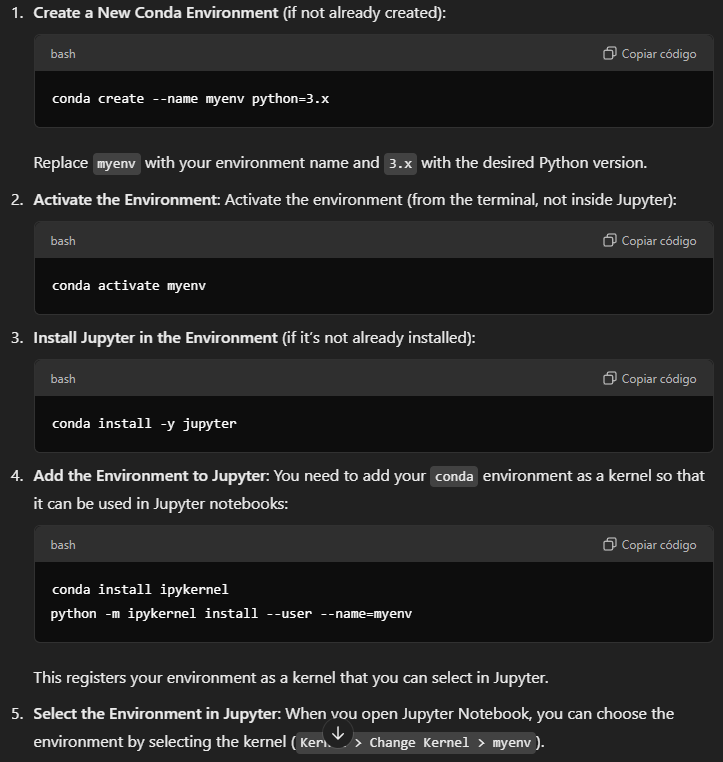

# file and directory access

There are a lot of modules related to this

https://docs.python.org/3/library/filesys.html

Built-in function open() - The standard way to open files for reading and writing.

https://docs.python.org/3/library/functions.html#open

print the working directory

In [ ]:
pwd

In [ ]:
import os

os - Operating system interfaces, including functions to work with files at a lower level than Python file objects.

https://docs.python.org/3/library/os.html#module-os

In [ ]:
help(dir)

In [ ]:
dir(os)

In [ ]:
os.getcwd()

In [ ]:
# TODO - there's a lot of useful things it can be used for. Ask ChatGPT

In [ ]:
import shutil

shutil — High-level file operations

https://docs.python.org/3/library/shutil.html

a path on Windows looks like

`C:\Users\user_name\projectx\datasets\file.txt`

on a Mac or Linux, looks like

`/home/user_name/projectx/datasets/file.txt`

that is, Windows machines use backslashes `\` in paths, while Macs/Linux use forward slashes `/`. 

eg. automatic file sorter in file explorer - create a folder for each file extension and place the files in the corresponding folder

In [ ]:
path_abs = r"D:\repos\python-jupyter\automatic-file-sorter" # absolute path, using a raw string
path_abs

Both string and bytes literals may optionally be prefixed with a letter `'r'` or `'R'`; such constructs are called raw string literals and raw bytes literals respectively and treat backslashes as literal characters. As a result, in raw string literals, `'\U'` and `'\u'` escapes are not treated specially.

In [ ]:
os.listdir(path_abs)

for portability, it's better to use forward slashes and relative paths in the code

In [ ]:
os.listdir('.') # working directory

In [ ]:
path_rel = './automatic-file-sorter' # relative path
path_rel

In [ ]:
os.listdir(path_rel)

In [ ]:
os.path.exists(path_rel + 'some_folder_name') # check if a folder or path exists

In [ ]:
folder_names = ['csv files', 'image files', 'gif files', 'text files']

for e in folder_names:
    if not os.path.exists(path_rel + '/' + e):
        os.mkdir(path_rel + '/' + e)

In [ ]:
os.listdir(path_rel)

In [ ]:
filenames = os.listdir(path_rel)

for filename in filenames:
    if '.txt' in filename:
        # move from initial path to new path
        shutil.move(path_rel + '/' + filename, path_rel + '/' + 'text files' + '/' + filename)
    elif '.csv' in filename:
        shutil.move(path_rel + '/' + filename, path_rel + '/' + 'csv files' + '/' + filename)
    elif '.jpeg' in filename or '.png' in filename:
        shutil.move(path_rel + '/' + filename, path_rel + '/' + 'image files' + '/' + filename)
    elif '.gif' in filename:
        shutil.move(path_rel + '/' + filename, path_rel + '/' + 'gif files' + '/' + filename)

In [ ]:
os.listdir(path_rel)

# regular expressions

**re** — Regular expression operations

https://docs.python.org/3/library/re.html

In [183]:
import re

In [184]:
text = "Hello!\n  World... \n \r ssssss"

In [185]:
# Split the text into a list of sentences using regex
sentences = re.split(r'(?<=[.!?])\s+', text)
sentences

['Hello!', 'World...', 'ssssss']

# testing

## `unittest`

https://docs.python.org/3/library/unittest.html

In [2]:
import unittest

In [ ]:
# TODO

## `pytest`

https://docs.pytest.org/en/stable/

`pip install -U pytest`

In [3]:
import pytest

In [4]:
dir(pytest)

['Cache',
 'CallInfo',
 'CaptureFixture',
 'Class',
 'CollectReport',
 'Collector',
 'Config',
 'Dir',
 'Directory',
 'DoctestItem',
 'ExceptionInfo',
 'ExitCode',
 'File',
 'FixtureDef',
 'FixtureLookupError',
 'FixtureRequest',
 'Function',
 'HookRecorder',
 'Item',
 'LineMatcher',
 'LogCaptureFixture',
 'Mark',
 'MarkDecorator',
 'MarkGenerator',
 'Metafunc',
 'Module',
 'MonkeyPatch',
 'OptionGroup',
 'Package',
 'Parser',
 'PytestAssertRewriteWarning',
 'PytestCacheWarning',
 'PytestCollectionWarning',
 'PytestConfigWarning',
 'PytestDeprecationWarning',
 'PytestExperimentalApiWarning',
 'PytestPluginManager',
 'PytestRemovedIn9Warning',
 'PytestReturnNotNoneWarning',
 'PytestUnhandledCoroutineWarning',
 'PytestUnhandledThreadExceptionWarning',
 'PytestUnknownMarkWarning',
 'PytestUnraisableExceptionWarning',
 'PytestWarning',
 'Pytester',
 'RecordedHookCall',
 'RunResult',
 'Session',
 'Stash',
 'StashKey',
 'TempPathFactory',
 'TempdirFactory',
 'TestReport',
 'TestShortLogRepor

In [ ]:
# TODO

# type hints

`typing` — Support for type hints

https://docs.python.org/3.13/library/typing.html

In [2]:
# Declaring variables with type hints
name: str = "Alice"
age: int = 30
is_active: bool = True
pi: float = 3.14159

type hints for collections

In [4]:
from typing import Dict, Tuple, Set, List

# List of integers
numbers: List[int] = [1, 2, 3]

# Dictionary with string keys and integer values
user_scores: Dict[str, int] = {"Alice": 85, "Bob": 90}

# Tuple containing a string and an integer
person_info: Tuple[str, int] = ("Alice", 30)

# Set of unique strings
unique_names: Set[str] = {"Alice", "Bob", "Charlie"}

type hints in functions

In [5]:
from typing import List, Tuple, Dict, Optional

# Function with type hints for parameters and return type
def greet(name: str, age: int) -> str:
    return f"Hello, {name}! You are {age} years old."

# Function returning a list of strings
def get_names() -> List[str]:
    return ["Alice", "Bob", "Charlie"]

# Function accepting a list of integers and returning a tuple of (sum, count)
def process_numbers(numbers: List[int]) -> Tuple[int, int]:
    return sum(numbers), len(numbers)

# Function with an optional parameter (can be None)
def find_person(name: str, age: Optional[int] = None) -> Dict[str, Optional[int]]:
    return {"name": name, "age": age}

# Testing the functions
print(greet("Alice", 30))
print(get_names())
print(process_numbers([1, 2, 3, 4]))
print(find_person("Bob"))
print(find_person("Charlie", 25))

Hello, Alice! You are 30 years old.
['Alice', 'Bob', 'Charlie']
(10, 4)
{'name': 'Bob', 'age': None}
{'name': 'Charlie', 'age': 25}


In [7]:
# for a class attribute

class Person:
    name: str
    age: int
    hobbies: List[str]
    nickname: Optional[str] = None  # Can be None by default

    def __init__(self, name: str, age: int, hobbies: List[str]):
        self.name = name
        self.age = age
        self.hobbies = hobbies

can also be used for other situations like:
* Union for multiple types
* Callable objects
* Type aliases
* Generics